# Udacity Project: Analysis of Airbnb Listings

This analysis will be developed for the cities of **Boston and Seattle.**


## Table of Contents

<ul>
<li><a href="#Business_Understanding">1. Business Understanding</a></li>
<li><a href="#Data_Understanding">2. Data Understanding</a></li>
    <ul>
    <li><a href="#Imports">Imports</a></li>
    <li><a href="#Load">Load the Data</a></li>
    <li><a href="#First_Approach">First Approach to the Datasets</a></li>
    </ul>
<li><a href="#Prepare_the_Data">3. Prepare the Data</a></li> 
    <ul>
    <li><a href="#Drop">Drop Out Some Columns</a></li>
    <li><a href="#Data_Types">Corrections in Data Types</a></li>
    <li><a href="#Imputing">Imputing Missing Values</a></li>
    </ul>
<li><a href="#Data_Modeling">4. Data Modeling</a></li> 

<li><a href="#Exploratory">5. Exploratory Analysis</a></li> 
    <ul>
    <li><a href="#Customers_Perception">Question 1: Perception of the Customers of the Different Types of Hosts</a></li>
    <li><a href="#diff_features">Question 2: Differences in the features between both cities</a></li>
    <ul>
        <li><a href="#host_verifications">host_verifications</a></li>
        <li><a href="#property_type">Property Type</a></li>
        <li><a href="#room_type">Bed Type</a></li>
        <li><a href="#bed_type">Room Type</a></li>
        <li><a href="#amenities">amenities</a></li>
    </ul> 
    <li><a href="#Geographical">Question 3: Geographical Distribution</a></li>
    </ul>
<li><a href="#Predictions">Question 4: Prediction Model</a></li>        
    <ul>
    <li><a href="#More_Modeling">More Modeling to Make the Predictions</a></li>
    <li><a href="#More_Dummies">More Dummy Columns</a></li>
    <li><a href="#Simple_Linear">Linear Regression Model</a></li>
    <li><a href="#Optimal_Linear">Find Optimal Linear Regression Model</a></li>
    <li><a href="#Main_Coeficients_Linear">Main Coeficients in the Linear Regression Model</a></li>
    <li><a href="#Main_Amenities_Linear">Main Amenities in the Linear Regression Model</a></li>
    <li><a href="#Random_Forests">Making Predictions With Random Forests</a></li>
    <li><a href="#Random_Forests_GS">Random Forest And GridSearchCV</a></li>
    <li><a href="#Importance">Comparison of the Importance of the Features</a></li>
    </ul>
</ul>
        
        

<a id='Business_Understanding'></a>
## 1. Business Understanding

Acording to Wikipedia, 

>"Airbnb is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking."

The hosts are anyone who wants to rent a room or a house by days, or even a sofa for a short staying. As in any other rental web page, they publish the characteristics of the lodging like the amenities, number of beds, if the pets are allowed, price, location, etc. At the same time, the customers can give their opinion about the staying by making reviews. 

In this project we are going to try to give an answer to the next questions:

1. How is the perception of the customers acording to the reviews received for the different types of hosts? We will make two cassifications for the hosts:

    * Superhost or normal hosts.
    * Hosts with a few lisntings (less than five) and hosts with several listings (more than 5).
    

2. We are going to study the geographical distribution of the listings in the two cities. Where are the more expensive neighbourhoods concentrated in each city? Which neighbourhoods are prefferred by the hosts with several listings.
    
3. Which are the main differences between Boston and Seattle regarding the features announced?

4. Which features are more iportant to predict the price of a listing?

<a id='Data_Understanding'></a>
## 2. Data Understanding

<a id='Imports'></a>
### Imports

In [1]:
#Basic imports: pandas, numpy, visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

#Imports to predictive models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#Import functions defined for this work
from auxiliary_functions import *

sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context("talk")

plt.style.use('seaborn-deep')
%matplotlib inline
random.seed(42)

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

<a id='Load'></a>
### Load the Data

The data collected for this project consists of six csv file with information about the Airbnb activity  in the cities of Boston and Seattle. This files are available in Kaggle in the following links:

* [Boston](https://www.kaggle.com/airbnb/boston/data)

* [Seattle](https://www.kaggle.com/airbnb/seattle/data)

This is the activity gathered for each city in each file:

* Listings file, including full descriptions and average review score
* Reviews file, including unique id for each reviewer and detailed comments
* Calendar file, including listing id and the price and availability for that day

In [2]:
# Import data from Boston
df_boston_calendar = pd.read_csv('./data/boston/calendar.csv')
df_boston_listings = pd.read_csv('./data/boston/listings.csv')
df_boston_reviews = pd.read_csv('./data/boston/reviews.csv')

# Import data from Seattle
df_seattle_calendar = pd.read_csv('./data/seattle/calendar.csv')
df_seattle_listings = pd.read_csv('./data/seattle/listings.csv')
df_seattle_reviews = pd.read_csv('./data/seattle/reviews.csv')

<a id='First_Approach'></a>
### First Approach to the Datasets

* **We take a look at df_boston_calendar:**

In [3]:
df_boston_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [4]:
df_boston_calendar.head()

listing_id        date available price
0    12147973  2017-09-05         f   NaN
1    12147973  2017-09-04         f   NaN
2    12147973  2017-09-03         f   NaN
3    12147973  2017-09-02         f   NaN
4    12147973  2017-09-01         f   NaN

In [5]:
df_boston_calendar.date.max(), df_boston_calendar.date.min()

('2017-09-05', '2016-09-06')

In [6]:
df_boston_calendar.listing_id.nunique()

3585

In [7]:
df_boston_calendar.available.value_counts()

f    665853
t    643037
Name: available, dtype: int64

* **We take a look at df_boston_listings:**

In [8]:
df_boston_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [9]:
df_boston_listings.head(3)

id                            listing_url       scrape_id  \
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   
1   3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2      6976      https://www.airbnb.com/rooms/6976  20160906204935   

  last_scraped                               name  \
0   2016-09-07         Sunny Bungalow in the City   
1   2016-09-07  Charming room in pet friendly apt   
2   2016-09-07   Mexican Folk Art Haven in Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a friendly, middle-aged guy in ...   

                                               space  \
0  The house has an open and cozy feel at the sam...   
1  Small but cozy and quite room with a full size...   
2  Come stay with a friendly, middle-aged guy in ...   

                                         description experiences_offered  \
0  Cozy, sunny, family home.  Master bedroom high...                none   
1  Charming and quiet room in a second floor 1910...                none   
2  Come stay with a friendly, middle-aged guy in ...                none   

                               neighborhood_overview  ... review_scores_value  \
0  Roslindale is quiet, convenient and friendly. ...  ...                 NaN   
1  The room is in Roslindale, a diverse and prima...  ...                 9.0   
2  The LOCATION: Roslindale is a safe and diverse...  ...                10.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN                NaN                f   
1                f     NaN                NaN                t   
2                f     NaN                NaN                f   

  cancellation_policy require_guest_profile_picture  \
0            moderate                             f   
1            moderate                             f   
2            moderate                             t   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              1   
1                                f                              1   
2                                f                              1   

   reviews_per_month  
0                NaN  
1               1.30  
2               0.47  

[3 rows x 95 columns]

In [10]:
df_boston_listings.last_scraped.unique()

array(['2016-09-07'], dtype=object)

In [11]:
df_boston_listings.space[0]

'The house has an open and cozy feel at the same time.  The living room has a flat screen TV.  The kitchen has all you need for cooking.  We prefer you buy your food but can use the organic oils, herbs, etc.   The yard can be seen from sitting room and when the weather allows, the yard is a place children can lose themselves in a safe way.  We have 2 bee hives, 6 hens fenced in (sometimes they get out of their coop area & into the yard), 2 rabbits in a hutch and play structure.'

In [12]:
df_boston_listings.description[0]

"Cozy, sunny, family home.  Master bedroom high ceilings. Deck, garden with hens, beehives & play structure.   Short walk to charming village with  attractive stores, groceries & local restaurants. Friendly neighborhood. Access public transportation. The house has an open and cozy feel at the same time.  The living room has a flat screen TV.  The kitchen has all you need for cooking.  We prefer you buy your food but can use the organic oils, herbs, etc.   The yard can be seen from sitting room and when the weather allows, the yard is a place children can lose themselves in a safe way.  We have 2 bee hives, 6 hens fenced in (sometimes they get out of their coop area & into the yard), 2 rabbits in a hutch and play structure. You will have access to 2 bedrooms, a living room, kitchen, bathrooms, and yard. Roslindale is quiet, convenient and friendly.  For Southern food try Redd's in Rozzie.  Italian Delfino's or Sophia's Grotto are great. Birch St Bistro has nice atmostphere--a little pri

* **df_boston_reviews:**

In [13]:
df_boston_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [14]:
df_boston_reviews.head()

listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   
1     1178162  4869189  2013-05-29      6452964     Charlotte   
2     1178162  5003196  2013-06-06      6449554     Sebastian   
3     1178162  5150351  2013-06-15      2215611        Marine   
4     1178162  5171140  2013-06-16      6848427        Andrew   

                                            comments  
0  My stay at islam's place was really cool! Good...  
1  Great location for both airport and city - gre...  
2  We really enjoyed our stay at Islams house. Fr...  
3  The room was nice and clean and so were the co...  
4  Great location. Just 5 mins walk from the Airp...

* **df_seattle_calendar:**

In [15]:
df_seattle_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [16]:
df_seattle_calendar.head()

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

In [17]:
df_seattle_calendar.date.max(), df_boston_calendar.date.min()

('2017-01-02', '2016-09-06')

In [18]:
df_seattle_calendar.listing_id.nunique()

3818

In [19]:
df_seattle_calendar.available.value_counts()

t    934542
f    459028
Name: available, dtype: int64

* **df_seattle_listings:**

In [20]:
df_seattle_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [21]:
df_seattle_listings.head(3)

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   

                               neighborhood_overview  ... review_scores_value  \
0                                                NaN  ...                10.0   
1  Queen Anne is a wonderful, truly functional vi...  ...                10.0   
2  Upper Queen Anne is a charming neighborhood fu...  ...                10.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN         WASHINGTON                f   
1                f     NaN         WASHINGTON                f   
2                f     NaN         WASHINGTON                f   

  cancellation_policy  require_guest_profile_picture  \
0            moderate                              f   
1              strict                              t   
2              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  

[3 rows x 92 columns]

In [22]:
df_seattle_listings.last_scraped.unique()

array(['2016-01-04'], dtype=object)

In [23]:
df_seattle_listings.space

0       Make your self at home in this charming one-be...
1       Beautiful, hypoallergenic apartment in an extr...
2       Our house is modern, light and fresh with a wa...
3                                                     NaN
4       Cozy family craftman house in beautiful neighb...
                              ...                        
3813    Our 3BR/2BA house bright, stylish, and wheelch...
3814    This space has a great view of Portage Bay wit...
3815                                                  NaN
3816    Fully furnished unit to accommodate most needs...
3817                                                  NaN
Name: space, Length: 3818, dtype: object

* **df_seattle_reviews:**

In [24]:
df_seattle_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [25]:
df_seattle_reviews.head()

listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...

<a id='Prepare_the_Data'></a>
## 3. Prepare the Data

First, we are going to wrangle the listings dataframe, where it is most of the information that we are going to use.
We can discard the reviews dataframe because we are not interested in analyzing the comments of the customers. A sentiment analysis could be done, but it is not the objective of this project.

**Copy the Original Dataframes**

We make a copy of the original dataframes to work with them in the following steps:

In [26]:
df_seattle_listings_cp = df_seattle_listings.copy()
df_boston_listings_cp = df_boston_listings.copy()

<a id='Drop'></a>
### Drop Out Some Columns

* We are not interested in some columns because they don't have data, or have very few data. Some of them have the same value in the file. Some dates are also not interesting, like `last_scraped` or `calendar_last_scraped`, etc. 



Columns with no data, few data, or with the same value in all the rows:

      scrape_id
      last_scraped
      experiences_offered
      neighbourhood_group_cleansed
      state
      market
      country_code
      country
      square_feet
      has_availability
      calendar_last_scraped
      requires_license
      license
      jurisdiction_names
      
      

In [27]:
most_missing_cols = set(df_boston_listings_cp.columns[df_boston_listings_cp.isnull().mean() > 0.75])
most_missing_cols

{'has_availability',
 'jurisdiction_names',
 'license',
 'monthly_price',
 'neighbourhood_group_cleansed',
 'square_feet',
 'weekly_price'}

In [28]:
most_missing_cols = set(df_seattle_listings_cp.columns[df_seattle_listings_cp.isnull().mean() > 0.75])
most_missing_cols

{'license', 'square_feet'}

In [29]:
df_boston_listings_cp.requires_license.nunique()

1

In [30]:
df_seattle_listings_cp.requires_license.nunique()

1

In [31]:
# Drop columns in Seattle listings
df_seattle_listings_cp = df_seattle_listings_cp.drop(columns = ['scrape_id', 
                                                                'last_scraped', 
                                                                'experiences_offered', 
                                                                'state', 
                                                                'market', 
                                                                'country_code', 
                                                                'country', 
                                                                'square_feet', 
                                                                'has_availability', 
                                                                'calendar_last_scraped', 
                                                                'requires_license', 
                                                                'license', 
                                                                'jurisdiction_names',
                                                                'monthly_price',
                                                                'weekly_price'])

# Drop columns in Boston listings
df_boston_listings_cp = df_boston_listings_cp.drop(columns = ['scrape_id', 
                                                              'last_scraped', 
                                                              'experiences_offered',  
                                                              'state', 
                                                              'market', 
                                                              'country_code', 
                                                              'country', 
                                                              'square_feet', 
                                                              'has_availability', 
                                                              'calendar_last_scraped', 
                                                              'requires_license', 
                                                              'license', 
                                                              'jurisdiction_names',
                                                              'monthly_price',
                                                              'weekly_price'])

* In general we want to do the same analysis in both cities so we are going to do the same changes in both dataframes. For example, in the list below, `neighbourhood_group_cleansed` has values in Seattle but not in Boston. Anyway, we drop it out in both files. We will use `neighbourhood_cleansed` instead because it has values in both cities. 

      access
      interaction
      house_rules
      host_acceptance_rate
      neighbourhood_group_cleansed

In [32]:
# Drop columns in Seattle listings
df_seattle_listings_cp = df_seattle_listings_cp.drop(columns = ['host_acceptance_rate', 
                                                                'neighbourhood_group_cleansed'])

# Drop columns in Boston listings
df_boston_listings_cp = df_boston_listings_cp.drop(columns = ['access', 
                                                              'interaction', 
                                                              'house_rules', 
                                                              'host_acceptance_rate', 
                                                              'neighbourhood_group_cleansed'])

* We are going to drop `host_total_listings_count` also because it has almost the same values than `host_listings_count`.

In [33]:
# Drop column in Seattle listings
df_seattle_listings_cp = df_seattle_listings_cp.drop(columns = ['host_total_listings_count'])

# Drop columns in Boston listings
df_boston_listings_cp = df_boston_listings_cp.drop(columns = ['host_total_listings_count'])

* The columns with URLs are also dropped:

In [34]:
# Drop columns in Seattle listings
df_seattle_listings_cp = df_seattle_listings_cp.drop(columns = ['listing_url',
                                                                'thumbnail_url',
                                                                'medium_url',
                                                                'picture_url',
                                                                'xl_picture_url',
                                                                'host_url',
                                                                'host_thumbnail_url',
                                                                'host_picture_url'])

# Drop columns in Boston listings
df_boston_listings_cp = df_boston_listings_cp.drop(columns = ['listing_url',
                                                                'thumbnail_url',
                                                                'medium_url',
                                                                'picture_url',
                                                                'xl_picture_url',
                                                                'host_url',
                                                                'host_thumbnail_url',
                                                                'host_picture_url'])

In [35]:
most_missing_cols = set(df_boston_listings_cp.columns[df_boston_listings_cp.isnull().mean() > 0.3])
most_missing_cols

{'cleaning_fee',
 'host_about',
 'neighborhood_overview',
 'notes',
 'security_deposit',
 'transit'}

In [36]:
most_missing_cols = set(df_seattle_listings_cp.columns[df_seattle_listings_cp.isnull().mean() > 0.3])
most_missing_cols

{'notes', 'security_deposit'}

* The columns related with names and descriptions will be dropped also. For example the texts that describe the house, the neighbourhood, the access, etc. We could do some analysis with this texts, but at this moment this is not the intention of this work.

In [37]:
# Drop columns in Seattle listings
df_seattle_listings_cp = df_seattle_listings_cp.drop(columns = ['name', 
                                                                'summary',
                                                                'space',
                                                                'description',
                                                                'neighborhood_overview',
                                                                'notes',
                                                                'transit',
                                                                'host_name',
                                                                'host_location',
                                                                'host_about',
                                                                'host_neighbourhood'])
                                                     
# Drop columns in Boston listings
df_boston_listings_cp = df_boston_listings_cp.drop(columns = ['name', 
                                                              'summary',
                                                              'space',
                                                              'description',
                                                              'neighborhood_overview',
                                                              'notes',
                                                              'transit',
                                                              'host_name',
                                                              'host_location',
                                                              'host_about',
                                                              'host_neighbourhood'])

* The columns related with Ids will be deleted also:

In [38]:
df_seattle_listings_cp = df_seattle_listings_cp.drop(columns = ['id', 'host_id'])
                                                     
# Drop columns in Boston listings
df_boston_listings_cp = df_boston_listings_cp.drop(columns = ['id', 'host_id'])

* I am going to remove also some other columns related with dates. I think that they are not going to be useful for our analysis.

In [39]:
# Drop columns in Seattle listings
df_seattle_listings_cp = df_seattle_listings_cp.drop(columns = ['host_since',
                                                                'calendar_updated',
                                                                'first_review',
                                                                'last_review'])

# Drop columns in Boston listings
df_boston_listings_cp = df_boston_listings_cp.drop(columns = ['host_since',
                                                              'calendar_updated',
                                                              'first_review',
                                                              'last_review'])


* We drop out also the column `neighbourhood` because we are going to use the column `neighbourhood_cleansed`.

In [40]:
# Drop columns in Seattle listings
df_seattle_listings_cp = df_seattle_listings_cp.drop(columns = ['neighbourhood'])

# Drop columns in Boston listings
df_boston_listings_cp = df_boston_listings_cp.drop(columns = ['neighbourhood'])

* We also delete the column `calculated_host_listings_count` becaus it has almost the same values as `host_listings_count`.

In [41]:
# Drop columns in Seattle listings
df_seattle_listings_cp = df_seattle_listings_cp.drop(columns = ['calculated_host_listings_count'])

# Drop columns in Boston listings
df_boston_listings_cp = df_boston_listings_cp.drop(columns = ['calculated_host_listings_count'])

* There are some boolean variables as objects with a couple of null values. We are going to drop them in order to convert these variables to boolean later.

In [42]:
boolean_variables = ['host_is_superhost', 
                     'host_has_profile_pic', 
                     'host_identity_verified', 
                     'is_location_exact', 
                     'instant_bookable', 
                     'require_guest_profile_picture', 
                     'require_guest_phone_verification']

In [43]:


aux = df_seattle_listings_cp[boolean_variables]
aux[aux.columns[aux.isnull().any()].tolist()].isnull().sum()

host_is_superhost         2
host_has_profile_pic      2
host_identity_verified    2
dtype: int64

In [44]:
aux = df_boston_listings_cp[boolean_variables]
aux[aux.columns[aux.isnull().any()].tolist()].isnull().sum()

Series([], dtype: float64)

In [45]:
df_seattle_listings_cp = df_seattle_listings_cp.dropna(subset=boolean_variables)

* We are going to drop the host_has_profile_pic because it almost has the same value in all the rows

In [46]:
df_boston_listings_cp[boolean_variables].describe()

host_is_superhost host_has_profile_pic host_identity_verified  \
count               3585                 3585                   3585   
unique                 2                    2                      2   
top                    f                    t                      t   
freq                3178                 3577                   2603   

       is_location_exact instant_bookable require_guest_profile_picture  \
count               3585             3585                          3585   
unique                 2                2                             2   
top                    t                f                             f   
freq                3080             2991                          3518   

       require_guest_phone_verification  
count                              3585  
unique                                2  
top                                   f  
freq                               3348

In [47]:
df_seattle_listings_cp[boolean_variables].describe()

host_is_superhost host_has_profile_pic host_identity_verified  \
count               3816                 3816                   3816   
unique                 2                    2                      2   
top                    f                    t                      t   
freq                3038                 3809                   2997   

       is_location_exact instant_bookable require_guest_profile_picture  \
count               3816             3816                          3816   
unique                 2                2                             2   
top                    t                f                             f   
freq                3410             3225                          3495   

       require_guest_phone_verification  
count                              3816  
unique                                2  
top                                   f  
freq                               3441

In [48]:
df_boston_listings_cp = df_boston_listings_cp.drop(columns = ['host_has_profile_pic'])
df_seattle_listings_cp = df_seattle_listings_cp.drop(columns = ['host_has_profile_pic'])

* We are going to use only the availability 30. The other types are very correlated between them.

In [49]:
df_boston_listings_cp = df_boston_listings_cp.drop(columns = ['availability_365', 'availability_60', 'availability_90'])
df_seattle_listings_cp = df_seattle_listings_cp.drop(columns = ['availability_365', 'availability_60', 'availability_90'])

<a id='Data_Types'></a>
### Corrections in Data Types:

* **Change the Boolean Variables to Boolean Type:**

The boolean variables in the dataset are shown as strings with values `t` or `f`. We need to chage them for the boolean values `True` or `False`.

In [50]:
df_seattle_listings_cp.host_identity_verified.unique()

array(['t', 'f'], dtype=object)

In [51]:
d = {'t': True, 'f': False}

boolean_variables = ['host_is_superhost', 
                     'host_identity_verified', 
                     'is_location_exact', 
                     'instant_bookable', 
                     'require_guest_profile_picture', 
                     'require_guest_phone_verification']

# Change the type for the boolean variables in Seattle
df_seattle_listings_cp[boolean_variables] = df_seattle_listings_cp[boolean_variables].replace(d)

# Change the type for the boolean variables in Boston
df_boston_listings_cp[boolean_variables] = df_boston_listings_cp[boolean_variables].replace(d)

* **Change the Type of Numerical Variables that are Saved as Strings:**

`host_response_rate` is represented as a string with the percentage character. We are going to change the type to integer.

In [52]:
df_seattle_listings_cp['host_response_rate'].head()

0     96%
1     98%
2     67%
3     NaN
4    100%
Name: host_response_rate, dtype: object

In [53]:
df_boston_listings_cp['host_response_rate'].head()

0     NaN
1    100%
2    100%
3    100%
4    100%
Name: host_response_rate, dtype: object

In [54]:
# Change the type for 'host_response_rate' in Seattle
df_seattle_listings_cp['host_response_rate'] = df_seattle_listings_cp['host_response_rate'] \
                                                 .replace(regex=True,to_replace=r'\%',value=r'') \
                                                 .astype(float)

# Change the type for 'host_response_rate' in Boston
df_boston_listings_cp['host_response_rate'] = df_boston_listings_cp['host_response_rate'] \
                                                 .replace(regex=True,to_replace=r'\%',value=r'') \
                                                 .astype(float)

In [55]:
df_seattle_listings_cp['host_response_rate'].head()

0     96.0
1     98.0
2     67.0
3      NaN
4    100.0
Name: host_response_rate, dtype: float64

Some numerical columns about prices are also saved as strings with the dollar symbol. We are going to convert them also to a numerical type:

In [56]:
df_seattle_listings_cp[['price', 
                        'security_deposit',
                        'cleaning_fee',
                        'extra_people']].head()

price security_deposit cleaning_fee extra_people
0   $85.00              NaN          NaN        $5.00
1  $150.00          $100.00       $40.00        $0.00
2  $975.00        $1,000.00      $300.00       $25.00
3  $100.00              NaN          NaN        $0.00
4  $450.00          $700.00      $125.00       $15.00

In [57]:
# Change the types in Seattle
df_seattle_listings_cp[['price', 
                        'security_deposit',
                        'cleaning_fee',
                        'extra_people']] = \
                         df_seattle_listings_cp[['price', 
                                                 'security_deposit',
                                                 'cleaning_fee',
                                                 'extra_people']] \
                                        .replace(regex=True,to_replace=r'\$|\,',value=r'') \
                                        .astype(float)

# Change the types in Boston
df_boston_listings_cp[['price', 
                       'security_deposit',
                       'cleaning_fee',
                       'extra_people']] = \
                       df_boston_listings_cp[['price', 
                                               'security_deposit',
                                               'cleaning_fee',
                                               'extra_people']] \
                                        .replace(regex=True,to_replace=r'\$|\,',value=r'') \
                                        .astype(float)

In [58]:
df_seattle_listings_cp[['price', 
                        'security_deposit',
                        'cleaning_fee',
                        'extra_people']].head()

price  security_deposit  cleaning_fee  extra_people
0   85.0               NaN           NaN           5.0
1  150.0             100.0          40.0           0.0
2  975.0            1000.0         300.0          25.0
3  100.0               NaN           NaN           0.0
4  450.0             700.0         125.0          15.0

In [59]:
df_boston_listings_cp[['price', 
                        'security_deposit',
                        'cleaning_fee',
                        'extra_people']].head()

price  security_deposit  cleaning_fee  extra_people
0  250.0               NaN          35.0           0.0
1   65.0              95.0          10.0           0.0
2   65.0               NaN           NaN          20.0
3   75.0             100.0          50.0          25.0
4   79.0               NaN          15.0           0.0

<a id='Imputing'></a>
### Imputing Missing Values

* The columns `security_deposit` and `cleaning_fee` can be filled with zeros. If they don't have a value is surely because the don't have these charges:

In [60]:
# Imput zeros in Boston
df_boston_listings_cp[['security_deposit', 
                        'cleaning_fee']] = df_boston_listings_cp[['security_deposit', 
                                                                  'cleaning_fee']].fillna(0)
# Imput zeros in Seattle
df_seattle_listings_cp[['security_deposit', 
                        'cleaning_fee']] = df_seattle_listings_cp[['security_deposit', 
                                                                   'cleaning_fee']].fillna(0)

* We do the same with `bathrooms`, `bedrooms` and `beds`. Checking some of them we have seen that they rent a couch not a bedroom. Anyway they are not many rows.

In [61]:
sum(df_seattle_listings_cp['bedrooms'].isna()), sum(df_seattle_listings_cp['beds'].isna()), sum(df_seattle_listings_cp['bathrooms'].isna())

(6, 1, 16)

In [62]:
sum(df_boston_listings_cp['bedrooms'].isna()), sum(df_boston_listings_cp['beds'].isna()), sum(df_boston_listings_cp['bathrooms'].isna())

(10, 9, 14)

In [63]:
# Imput zeros in Boston
df_boston_listings_cp[['bathrooms', 'bedrooms', 'beds']] = df_boston_listings_cp[['bathrooms', 'bedrooms', 'beds']].fillna(0).astype(int)

# Imput zeros in Boston
df_seattle_listings_cp[['bathrooms', 'bedrooms', 'beds']] = df_seattle_listings_cp[['bathrooms', 'bedrooms', 'beds']].fillna(0).astype(int)

In [64]:
df_seattle_listings_cp_aux = df_seattle_listings_cp[['bedrooms', 'price']].groupby('bedrooms')['price'].mean()
df_boston_listings_cp_aux = df_boston_listings_cp[['bedrooms', 'price']].groupby('bedrooms')['price'].mean()

In [65]:
df_seattle_listings_cp['bedrooms'].value_counts()

1    2416
2     640
0     377
3     283
4      69
5      24
6       6
7       1
Name: bedrooms, dtype: int64

In [66]:
df_boston_listings_cp['bedrooms'].value_counts()

1    2379
2     693
0     297
3     155
4      45
5      16
Name: bedrooms, dtype: int64

In [67]:
df_seattle_listings_cp_aux

bedrooms
0    103.718833
1     95.642384
2    174.062500
3    249.530035
4    313.695652
5    441.000000
6    578.166667
7    375.000000
Name: price, dtype: float64

In [68]:
df_boston_listings_cp_aux.head(10)

bedrooms
0    156.740741
1    136.285834
2    258.753247
3    316.419355
4    389.400000
5    429.000000
Name: price, dtype: float64

* Some columns that have a lot of missing values are those related with reviews and host response rate. To not miss this information we can try to fill them with the mean value for each column.

In [69]:
cols_mean = ['host_response_rate',
             'review_scores_rating',
             'review_scores_accuracy',
             'review_scores_cleanliness',
             'review_scores_checkin', 
             'review_scores_communication',
             'review_scores_location',
             'review_scores_value']

fill_mean = lambda col: col.fillna(col.mean())

df_boston_listings_cp[cols_mean] = df_boston_listings_cp[cols_mean].apply(fill_mean, axis=0)
df_seattle_listings_cp[cols_mean] = df_seattle_listings_cp[cols_mean].apply(fill_mean, axis=0)

* Applying the same criteria that in the step befrore we can fill the column `host_response_time` with the mode. This is a categorical variable.

In [70]:
fill_mode = lambda col: col.fillna(col.mode()[0])

df_boston_listings_cp[['host_response_time']] = df_boston_listings_cp[['host_response_time']].apply(fill_mode, axis=0)
df_seattle_listings_cp[['host_response_time']] = df_seattle_listings_cp[['host_response_time']].apply(fill_mode, axis=0)

* Finally, all the rows witn `reviews_per_month` null have zero reviews, so we are going to fill those missin values with zero also. 

In [71]:
# Imput zeros in Boston
df_boston_listings_cp[['reviews_per_month']] = df_boston_listings_cp[['reviews_per_month']].fillna(0)

# Imput zeros in Boston
df_seattle_listings_cp[['reviews_per_month']] = df_seattle_listings_cp[['reviews_per_month']].fillna(0)

* We drop out the rest of the rows:

In [72]:
df_boston_listings_cp = df_boston_listings_cp.dropna()
df_seattle_listings_cp = df_seattle_listings_cp.dropna()

print('Boston Shape: ',df_boston_listings_cp.shape)
print('Seattle Shape: ',df_seattle_listings_cp.shape)

Boston Shape:  (3542, 43)
Seattle Shape:  (3808, 43)


In [73]:
df_boston_listings_cp.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3542 entries, 0 to 3584
Data columns (total 43 columns):
host_response_time                  3542 non-null object
host_response_rate                  3542 non-null float64
host_is_superhost                   3542 non-null bool
host_listings_count                 3542 non-null int64
host_verifications                  3542 non-null object
host_identity_verified              3542 non-null bool
street                              3542 non-null object
neighbourhood_cleansed              3542 non-null object
city                                3542 non-null object
zipcode                             3542 non-null object
smart_location                      3542 non-null object
latitude                            3542 non-null float64
longitude                           3542 non-null float64
is_location_exact                   3542 non-null bool
property_type                       3542 non-null object
room_type                           3542 n

In [74]:
df_seattle_listings_cp.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 0 to 3817
Data columns (total 43 columns):
host_response_time                  3808 non-null object
host_response_rate                  3808 non-null float64
host_is_superhost                   3808 non-null bool
host_listings_count                 3808 non-null float64
host_verifications                  3808 non-null object
host_identity_verified              3808 non-null bool
street                              3808 non-null object
neighbourhood_cleansed              3808 non-null object
city                                3808 non-null object
zipcode                             3808 non-null object
smart_location                      3808 non-null object
latitude                            3808 non-null float64
longitude                           3808 non-null float64
is_location_exact                   3808 non-null bool
property_type                       3808 non-null object
room_type                           3808

<a id='Data_Modeling'></a>
## 4. Data Modeling

### `host_verifications` and `amenities` 

These columns contain lists of elements that nedd to be separated in different columns to analyse them one by one. We are going to create a different boolean column for each element in these categories. 

* **`host_verifications`:** 

First, we list all the possible values:

In [75]:
df_seattle_listings_cp.host_verifications.head()

0                 ['email', 'phone', 'reviews', 'kba']
1    ['email', 'phone', 'facebook', 'linkedin', 're...
2     ['email', 'phone', 'google', 'reviews', 'jumio']
3    ['email', 'phone', 'facebook', 'reviews', 'jum...
4     ['email', 'phone', 'facebook', 'reviews', 'kba']
Name: host_verifications, dtype: object

In [76]:
# It creates a set with all the possible values for 'host_verivication' in Seattle'
seattle_verifications_set = set()
df_seattle_listings_cp['host_verifications'].replace(regex=True,to_replace=r'\]|\[|\,|\'',value=r'') \
                                            .str.split() \
                                            .apply(seattle_verifications_set.update)
seattle_verifications_set

{'amex',
 'email',
 'facebook',
 'google',
 'jumio',
 'kba',
 'linkedin',
 'manual_offline',
 'manual_online',
 'phone',
 'photographer',
 'reviews',
 'sent_id',
 'weibo'}

In [77]:
# It creates a set with all the possible values for 'host_verivication' in Boston'
boston_verifications_set = set()
df_boston_listings_cp['host_verifications'].replace(regex=True,to_replace=r'\]|\[|\,|\'',value=r'') \
                                            .str.split() \
                                            .apply(boston_verifications_set.update)
boston_verifications_set

{'amex',
 'email',
 'facebook',
 'google',
 'jumio',
 'kba',
 'linkedin',
 'manual_offline',
 'manual_online',
 'phone',
 'reviews',
 'sent_id',
 'weibo'}

* We define a function that returns True of False if an elememt is contained or not in the list of a position inside a column.

In [78]:
#A function that checks if 'element' is contained inside "row['column']"
#It returns True if it is contained and False if it is not contained.
def label_check (row, element, column):  
    if element in row[column]:
        return True
    else: 
        return False


In [79]:
# it creates a column for all the elements in boston_verifications_set.
# It goes through all the rows of df_boston_listings_cp and if the element is in df_boston_listings_cp['host_verifications'],
# it fills the dummy column with a True, if not, it puts a False.
for element in boston_verifications_set:
    #Goes through the column host_verifications checking if the element is in each row and puts a value of True or False in a
    #a new column.
    df_boston_listings_cp['verification_' + element] = \
    df_boston_listings_cp.apply(lambda row: label_check(row, element, 'host_verifications'), axis=1)
#Drops the old column host_verifications
df_boston_listings_cp = df_boston_listings_cp.drop(columns = ['host_verifications'])

In [80]:
# it creates a column for all the elements in seattle_verifications_set.
# It goes through all the rows of df_seattle_listings_cp and if the element is in df_seattle_listings_cp['host_verifications'],
# it fills the dummy column with a  True, if not, it puts a False.
for element in seattle_verifications_set:
    #Goes through the column host_verifications checking if the element is in each row and puts a value of True or False in a
    #a new column.
    df_seattle_listings_cp['verification_' + element] = \
    df_seattle_listings_cp.apply(lambda row: label_check(row, element, 'host_verifications'), axis=1)
#Drops the old column host_verifications
df_seattle_listings_cp = df_seattle_listings_cp.drop(columns = ['host_verifications'])

* **`amenities`:**

We repeat a similar proccess for the column amenities.

In [81]:
df_seattle_listings_cp.amenities.head()

0    {TV,"Cable TV",Internet,"Wireless Internet","A...
1    {TV,Internet,"Wireless Internet",Kitchen,"Free...
2    {TV,"Cable TV",Internet,"Wireless Internet","A...
3    {Internet,"Wireless Internet",Kitchen,"Indoor ...
4    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, dtype: object

In [82]:
# It creates a set with all the possible values for 'amenities' in Seattle'
seattle_amenities_set = set()
df_seattle_listings_cp['amenities'].replace(regex=True,to_replace=r'\{|\}|\"|\'',value=r'') \
                                   .str.split(',') \
                                   .apply(seattle_amenities_set.update)
seattle_amenities_set.discard('')
seattle_amenities_set

{'24-Hour Check-in',
 'Air Conditioning',
 'Breakfast',
 'Buzzer/Wireless Intercom',
 'Cable TV',
 'Carbon Monoxide Detector',
 'Cat(s)',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'Elevator in Building',
 'Essentials',
 'Family/Kid Friendly',
 'Fire Extinguisher',
 'First Aid Kit',
 'Free Parking on Premises',
 'Gym',
 'Hair Dryer',
 'Hangers',
 'Heating',
 'Hot Tub',
 'Indoor Fireplace',
 'Internet',
 'Iron',
 'Kitchen',
 'Laptop Friendly Workspace',
 'Lock on Bedroom Door',
 'Other pet(s)',
 'Pets Allowed',
 'Pets live on this property',
 'Pool',
 'Safety Card',
 'Shampoo',
 'Smoke Detector',
 'Smoking Allowed',
 'Suitable for Events',
 'TV',
 'Washer',
 'Washer / Dryer',
 'Wheelchair Accessible',
 'Wireless Internet'}

In [83]:
# It creates a set with all the possible values for 'amenities' in Boston'
boston_amenities_set = set()
df_boston_listings_cp['amenities'].replace(regex=True,to_replace=r'\{|\}|\"|\'',value=r'') \
                                  .str.split(',') \
                                  .apply(boston_amenities_set.update)
boston_amenities_set.discard('')
boston_amenities_set.discard('translation missing: en.hosting_amenity_49')
boston_amenities_set.discard('translation missing: en.hosting_amenity_50')
boston_amenities_set

{'24-Hour Check-in',
 'Air Conditioning',
 'Breakfast',
 'Buzzer/Wireless Intercom',
 'Cable TV',
 'Carbon Monoxide Detector',
 'Cat(s)',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'Elevator in Building',
 'Essentials',
 'Family/Kid Friendly',
 'Fire Extinguisher',
 'First Aid Kit',
 'Free Parking on Premises',
 'Free Parking on Street',
 'Gym',
 'Hair Dryer',
 'Hangers',
 'Heating',
 'Hot Tub',
 'Indoor Fireplace',
 'Internet',
 'Iron',
 'Kitchen',
 'Laptop Friendly Workspace',
 'Lock on Bedroom Door',
 'Other pet(s)',
 'Paid Parking Off Premises',
 'Pets Allowed',
 'Pets live on this property',
 'Pool',
 'Safety Card',
 'Shampoo',
 'Smoke Detector',
 'Smoking Allowed',
 'Suitable for Events',
 'TV',
 'Washer',
 'Washer / Dryer',
 'Wheelchair Accessible',
 'Wireless Internet'}

In [84]:
# it creates a column for all the elements in boston_amenities_set.
# It goes through all the rows of df_boston_listings_cp and if the element is in df_boston_listings_cp['amenities'],
# it fills the dummy column with a 1, if not, it puts a 0.
seattle_amenities_columns = []
for element in seattle_amenities_set:
    #replace strange characters
    name = element.replace(' / ', '_').replace('/', '_').replace(' ', '_').replace(' ', '_').replace('(s)', 's')
    #adds a new column for this element
    seattle_amenities_columns.append('amenities_' + name)
    #Go through the column amenitis checking if the element is each row and puts a value of True or False in the
    #column before.
    df_seattle_listings_cp['amenities_' + name] = \
    df_seattle_listings_cp.apply(lambda row: label_check(row, element, 'amenities'), axis=1)
    
#drops the old columns amenities
df_seattle_listings_cp = df_seattle_listings_cp.drop(columns = ['amenities'])

In [85]:
# it creates a column for all the elements in seattle_amenities_set.
# It goes through all the rows of df_boston_listings_cp and if the element is in df_seattle_listings_cp['amenities'],
# it fills the dummy column with a 1, if not, it puts a 0.
boston_amenities_columns = []
for element in boston_amenities_set:
    #replace strange characters
    name = element.replace(' / ', '_').replace('/', '_').replace(' ', '_').replace(' ', '_').replace('(s)', 's')
    #adds a new column for this element
    boston_amenities_columns.append('amenities_' + name)
    #Go through the column amenitis checking if the element is each row and puts a value of True or False in the
    #column before.
    df_boston_listings_cp['amenities_' + name] = \
    df_boston_listings_cp.apply(lambda row: label_check(row, element, 'amenities'), axis=1)
    
#drops the old columns amenities
df_boston_listings_cp = df_boston_listings_cp.drop(columns = ['amenities'])

In [86]:
#We merge this two categories: Internet and Wireless_Internet, because we had some strange values in the predictions. They are very similar.
df_boston_listings_cp['amenities_Internet'] = df_boston_listings_cp['amenities_Internet'] | df_boston_listings_cp['amenities_Wireless_Internet']
df_boston_listings_cp = df_boston_listings_cp.drop(columns = ['amenities_Wireless_Internet'])
boston_amenities_columns.remove('amenities_Wireless_Internet')

df_seattle_listings_cp['amenities_Internet'] = df_seattle_listings_cp['amenities_Internet'] | df_seattle_listings_cp['amenities_Wireless_Internet']
df_seattle_listings_cp = df_seattle_listings_cp.drop(columns = ['amenities_Wireless_Internet'])
seattle_amenities_columns.remove('amenities_Wireless_Internet')

### `price`:

We have twoo variable refering to economical costs: `price` and `cleaning_fee`. It could be interesting to sum them into a new column `total_price` in order to obtain the total cost of the listing. To not loose the information `cleaning_fee`, we are going to transform this variable in a boolean variabble: True when the listing has a cleaning fee and False when is 0.

In [87]:
#create the new columns
df_boston_listings_cp['total_price'] = df_boston_listings_cp['price'] + df_boston_listings_cp['cleaning_fee']
df_seattle_listings_cp['total_price'] = df_seattle_listings_cp['price'] + df_seattle_listings_cp['cleaning_fee']

#delete the old columns in Boston
df_boston_listings_cp = df_boston_listings_cp.drop(columns = ['price'])
df_boston_listings_cp.cleaning_fee = df_boston_listings_cp.cleaning_fee > 0

#delete the old columns in Seattle
df_seattle_listings_cp = df_seattle_listings_cp.drop(columns = ['price'])
df_seattle_listings_cp.cleaning_fee = df_seattle_listings_cp.cleaning_fee > 0

### `neighbourhood_group`:

Now we are going to divide the neighbourhoods in three groups according to the price.

    * First, we calculate the mean of the price for every neighbourhood.
    
    * Then we divide the neighbourhoods in three groups: the cheapest group, the medium group and the more expensive group.
    
    * We add a new categorical column `neighbourhood_group` with the values: 'small_price', 'medium_price' and 'high_price'.
    
We will use this new column to compare the different kind of neighbourhoods between the two cities.

The column used to calculate the mean cost will be `total_price` and the column to clasify de neighbourhoods will be `neighbourhood_cleansed`.

In [88]:
df_seattle_listings_cp['neighbourhood_group'] = df_seattle_listings_cp.groupby('neighbourhood_cleansed')['total_price'].transform('mean')
df_boston_listings_cp['neighbourhood_group'] = df_boston_listings_cp.groupby('neighbourhood_cleansed')['total_price'].transform('mean')

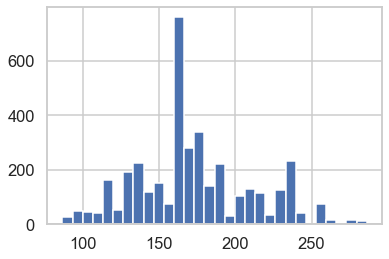

In [89]:
df_seattle_listings_cp['neighbourhood_group'].hist(bins = 30);

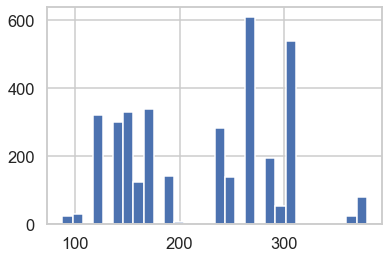

In [90]:
df_boston_listings_cp['neighbourhood_group'].hist(bins = 30);

In [91]:
df_seattle_listings_cp['neighbourhood_group'] = pd.cut(df_seattle_listings_cp['neighbourhood_group'], 
                                                       bins=3, 
                                                       labels=['low_price', 'medium_price', 'high_price'])
df_boston_listings_cp['neighbourhood_group'] = pd.cut(df_boston_listings_cp['neighbourhood_group'], 
                                                      bins=3, 
                                                      labels=['low_price', 'medium_price', 'high_price'])

In [92]:
df_seattle_listings_cp['neighbourhood_group'].value_counts()

medium_price    2190
low_price       1064
high_price       554
Name: neighbourhood_group, dtype: int64

In [93]:
df_seattle_listings_cp.groupby(['neighbourhood_group']).mean()['total_price']

neighbourhood_group
low_price       129.522556
medium_price    177.034247
high_price      240.411552
Name: total_price, dtype: float64

In [94]:
df_boston_listings_cp['neighbourhood_group'].value_counts()

low_price       1468
medium_price    1183
high_price       891
Name: neighbourhood_group, dtype: int64

In [95]:
df_boston_listings_cp.groupby(['neighbourhood_group']).mean()['total_price']

neighbourhood_group
low_price       147.893052
medium_price    249.090448
high_price      308.263749
Name: total_price, dtype: float64

<a id='More_Dummies'></a>
### More Dummy Columns

In this part we are going to convert some categorical columns to dummy columns in order to apply predictive models..

These are the categorical variables that we have in our datasets:

In [96]:
categorical_colums = df_boston_listings_cp.select_dtypes(include=['object']).columns
categorical_colums

Index(['host_response_time', 'street', 'neighbourhood_cleansed', 'city',
       'zipcode', 'smart_location', 'property_type', 'room_type', 'bed_type',
       'cancellation_policy'],
      dtype='object')

In [97]:
categorical_colums = df_seattle_listings_cp.select_dtypes(include=['object']).columns
categorical_colums

Index(['host_response_time', 'street', 'neighbourhood_cleansed', 'city',
       'zipcode', 'smart_location', 'property_type', 'room_type', 'bed_type',
       'cancellation_policy'],
      dtype='object')

We have defined a function called `get_dummy_columns` in `auxiliary_functions.py` in which we create dummy variables for an specific column and saves the name of the columns and intercept created.

In [98]:
#create the dummy columns for host_response_time in Boston
df_boston_listings_cp, boston_host_response_cols, boston_host_response_int = get_dummy_columns(df_boston_listings_cp, 
                                                                                        'host_response_time')

#create the dummy columns for host_response_time in Seattle
df_seattle_listings_cp, seattle_host_response_cols, seattle_host_response_int = get_dummy_columns(df_seattle_listings_cp, 
                                                                                         'host_response_time')

In [99]:


#create the dummy columns for property_type in Boston
df_boston_listings_cp, boston_property_type_cols, boston_property_type_int = get_dummy_columns(df_boston_listings_cp, 
                                                                                        'property_type')

#create the dummy columns for property_type in Seattle
df_seattle_listings_cp, seattle_property_type_cols, seattle_property_type_int = get_dummy_columns(df_seattle_listings_cp, 
                                                                                          'property_type')

In [100]:
#create the dummy columns for room_type in Boston
df_boston_listings_cp, boston_room_type_cols, boston_room_type_int = get_dummy_columns(df_boston_listings_cp, 
                                                                                'room_type')

#create the dummy columns for room_type in Seattle
df_seattle_listings_cp, seattle_room_type_cols, seattle_room_type_int = get_dummy_columns(df_seattle_listings_cp, 
                                                                                 'room_type')

In [101]:
#create the dummy columns for bed_type in Boston
df_boston_listings_cp, boston_bed_type_cols, boston_bed_type_int = get_dummy_columns(df_boston_listings_cp, 
                                                                             'bed_type')

#create the dummy columns for bed_type in Seattle
df_seattle_listings_cp, seattle_bed_type_cols, seattle_bed_type_int = get_dummy_columns(df_seattle_listings_cp, 
                                                                                'bed_type')

In [102]:
#create the dummy columns for cancellation_policy in Boston
df_boston_listings_cp, boston_canc_policy_cols, boston_canc_policy_int = get_dummy_columns(df_boston_listings_cp, 
                                                                                    'cancellation_policy')

#create the dummy columns for cancellation_policy in Seattle
df_seattle_listings_cp, seattle_canc_policy_cols, seattle_canc_policy_int = get_dummy_columns(df_seattle_listings_cp, 
                                                                                       'cancellation_policy')

<a id='Exploratory'></a>
## 5. Exploratory Analysis

### Correlation Between Numerical Variables

Once we have prerared the data, we are going to start exploring the correlation between the different numerical variables.

In [103]:
numerical_colums = df_boston_listings_cp.select_dtypes(include=['float64', 'int64', 'int32']).columns

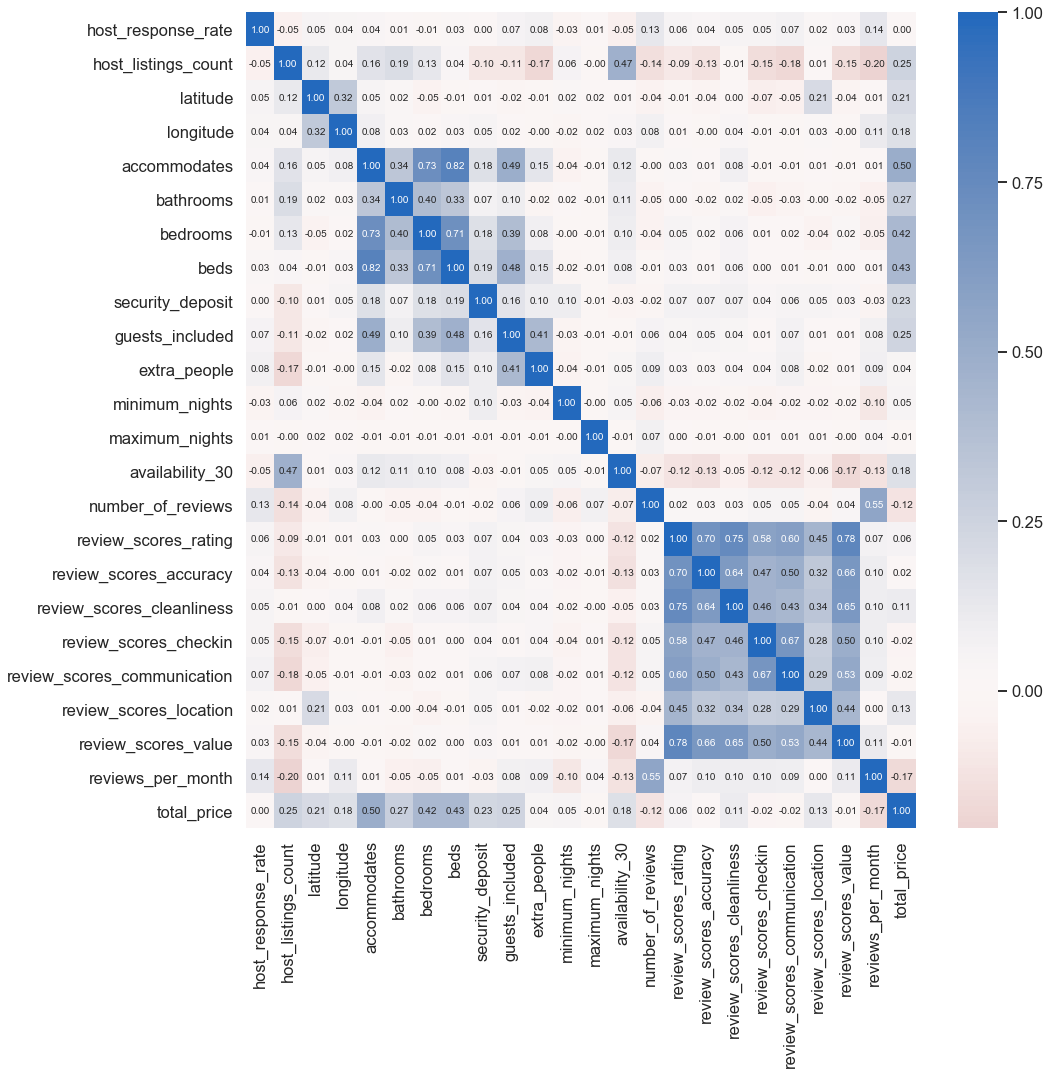

In [104]:
df_boston_listings_numerical = df_boston_listings_cp[numerical_colums]
plt.subplots(figsize=(15,15))
sns.heatmap(df_boston_listings_numerical.corr(), annot = True, cmap = 'vlag_r', center = 0, fmt = '.2f');

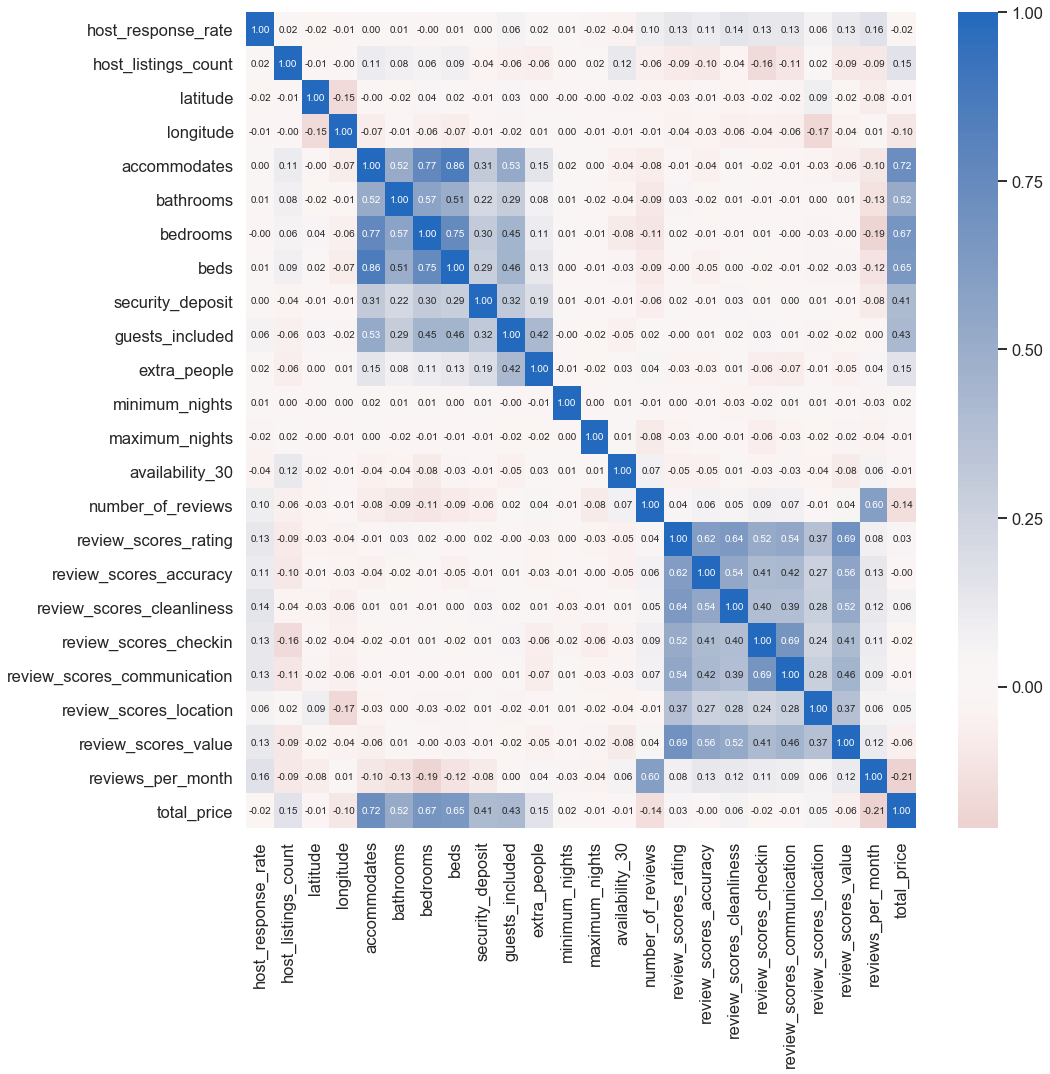

In [105]:
df_seattle_listings_numerical = df_seattle_listings_cp[numerical_colums]
plt.subplots(figsize=(15,15))
sns.heatmap(df_seattle_listings_numerical.corr(), annot = True, cmap = 'vlag_r', center = 0, fmt = '.2f');

In [106]:
df_boston_listings_cp[df_boston_listings_cp.total_price > 800].shape

(27, 121)

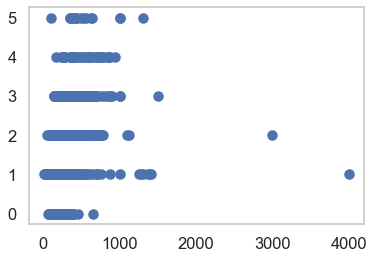

In [107]:
plt.scatter(df_boston_listings_cp.total_price, df_boston_listings_cp.bedrooms)

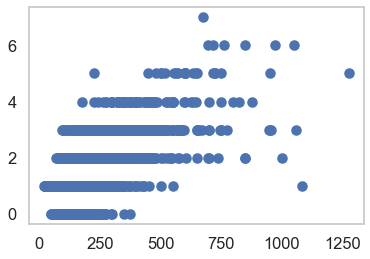

In [108]:
plt.scatter(df_seattle_listings_cp.total_price, df_seattle_listings_cp.bedrooms)

There are some prices that can act as outliers, specially in Boston.

In [109]:
df_boston_listings_limited = df_boston_listings_cp[df_boston_listings_cp.total_price < 800]

In [110]:
df_seattle_listings_limited = df_seattle_listings_cp[df_seattle_listings_cp.total_price < 800]

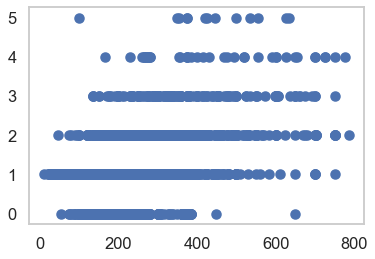

In [111]:
plt.scatter(df_boston_listings_limited.total_price, df_boston_listings_limited.bedrooms)

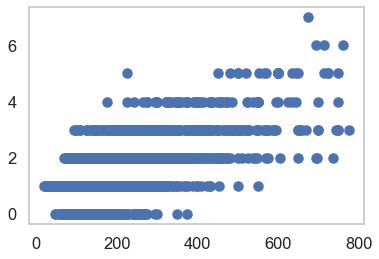

In [112]:
plt.scatter(df_seattle_listings_limited.total_price, df_seattle_listings_limited.bedrooms)

#### Conclusions:

* We can see some groups of variables correlated between them in both cities, but these correlations can be pretty normal due the nature of the variables:

    
    - The variables about reviews are correlated between them.
    
    - The variables about avalability are also correlated between them.
    
    - We can see also correlation between `accommodattes`, `bathrooms`, `bedrooms`, `beds`, `total_price`, `security deposit`,  `guests included` and `extra people`.
    

* On the other hand, there are some other conclusions that can be more informative.


    - In Boston the `total_price` is not so correlated with variables like `beds`, `bedrooms` and `accomodates` as in Seattle, but it's more correlated with the `latitud` and the `longitud`.
    
    - `hosts_listings_count` has some negative correlation with the reviews variables. This surely means that those hosts with many listings have a little worse evaluation from their customers. This is more clear in Seattle than in Boston.
          
    - Threre is also a positive correlation between `hosts_listings_count` and the availability, specially in Boston.
    

* There are two clear outliers in the `price` in Boston. To avoid distorsions in the analysis by values abnormally high we have created created two new dataframes filtering the prices higher than 800\$. This can give us a better assessment about the "normal" behaviour of the market.

<a id='Customers_Perception'></a>
### Question 1: Perception of the Customers of the Different Types of Hosts

We are going to do two classifications of the hosts: Those who are superhost or not and those who have more than 5 listings or less.

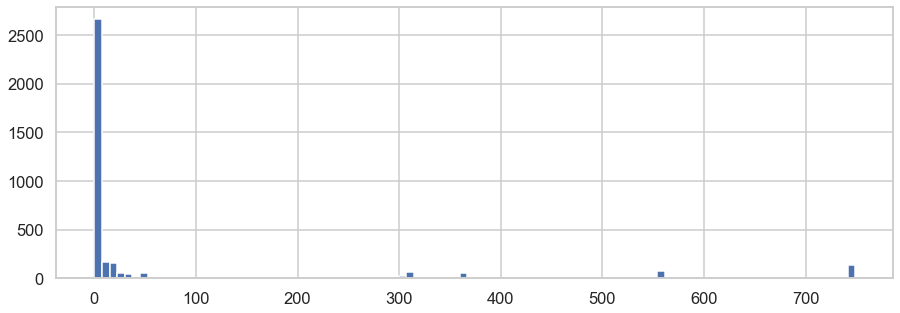

In [113]:
#Distribution of number of listings per host in Boston
plt.subplots(figsize=(15,5))
df_boston_listings_limited.host_listings_count.hist(bins=100);

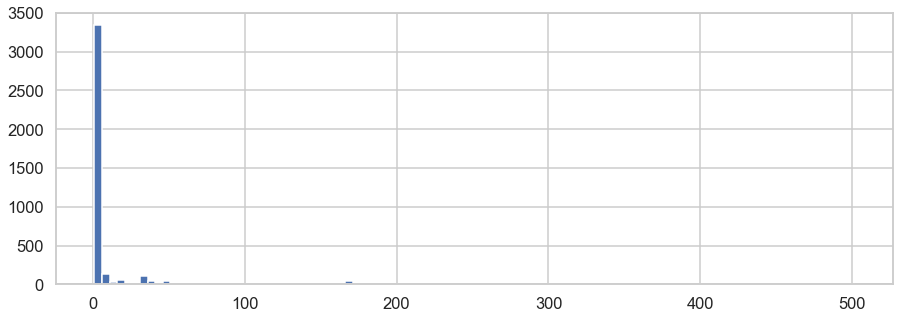

In [114]:
#Distribution of number of listings per host in Seattle
plt.subplots(figsize=(15,5))
df_seattle_listings_limited.host_listings_count.hist(bins=100);

In [115]:
df_boston_listings_limited.host_is_superhost.value_counts()

False    3112
True      401
Name: host_is_superhost, dtype: int64

In [116]:
df_seattle_listings_limited.host_is_superhost.value_counts()

False    3019
True      773
Name: host_is_superhost, dtype: int64

In [117]:
# It adds a new column to identify those hosths with more than 5 listings.
df_boston_listings_limited['several_listings'] = df_boston_listings_limited.host_listings_count > 5
df_seattle_listings_limited['several_listings'] = df_seattle_listings_limited.host_listings_count > 5

In [118]:
df_boston_listings_limited.several_listings.value_counts()

False    2513
True     1000
Name: several_listings, dtype: int64

In [119]:
df_seattle_listings_limited.several_listings.value_counts()

False    3289
True      503
Name: several_listings, dtype: int64

We plot a comparison of the general score in reviews for the hosts with more than 5 listings and for those with less than 5 listings.

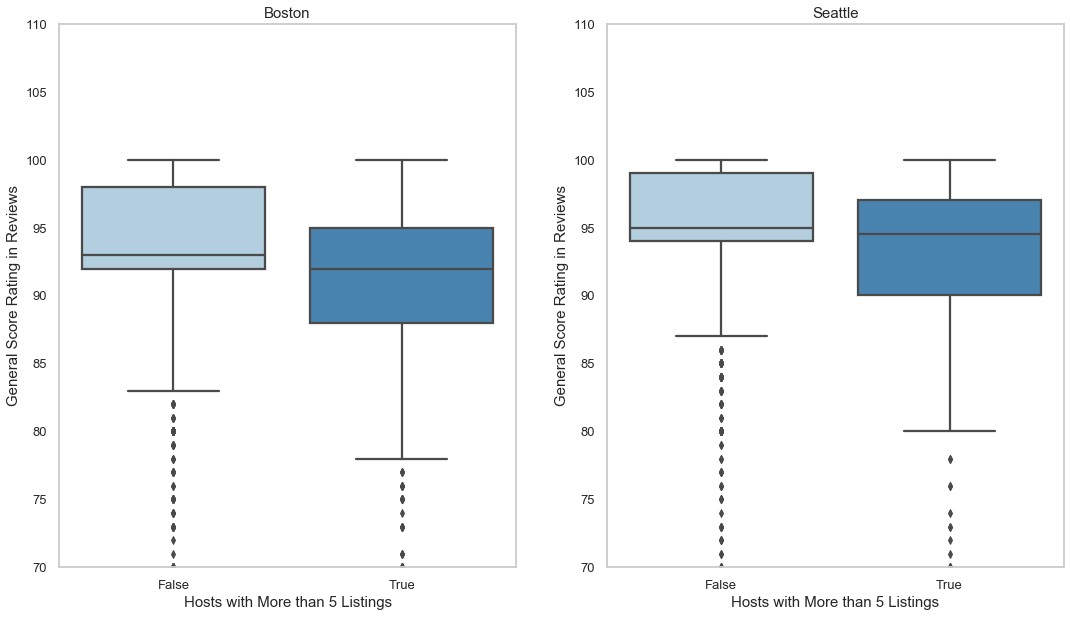

In [120]:
plt.subplots(figsize=(18,10))

#Boxplot with the distribution of scores in the hosts of Boston
plt.subplot(1, 2, 1)
ax = sns.boxplot(x=df_boston_listings_limited.several_listings, 
                 y=df_boston_listings_limited.review_scores_rating, 
                 palette="Blues")

ax.set_xlabel("Hosts with More than 5 Listings",fontsize=15)
ax.set_ylabel("General Score Rating in Reviews",fontsize=15)
ax.set_title("Boston", fontsize=15)
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set(ylim=(70, 110));

#Boxplot with the distribution of scores in the hosts of Seattle
plt.subplot(1, 2, 2)
ax = sns.boxplot(x=df_seattle_listings_limited.several_listings, 
                 y=df_seattle_listings_limited.review_scores_rating, 
                 palette="Blues")

ax.set_xlabel("Hosts with More than 5 Listings",fontsize=15)
ax.set_ylabel("General Score Rating in Reviews",fontsize=15)
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_title("Seattle", fontsize=15)
ax.set(ylim=(70, 110));

This is a nother graph to see the same distributions:

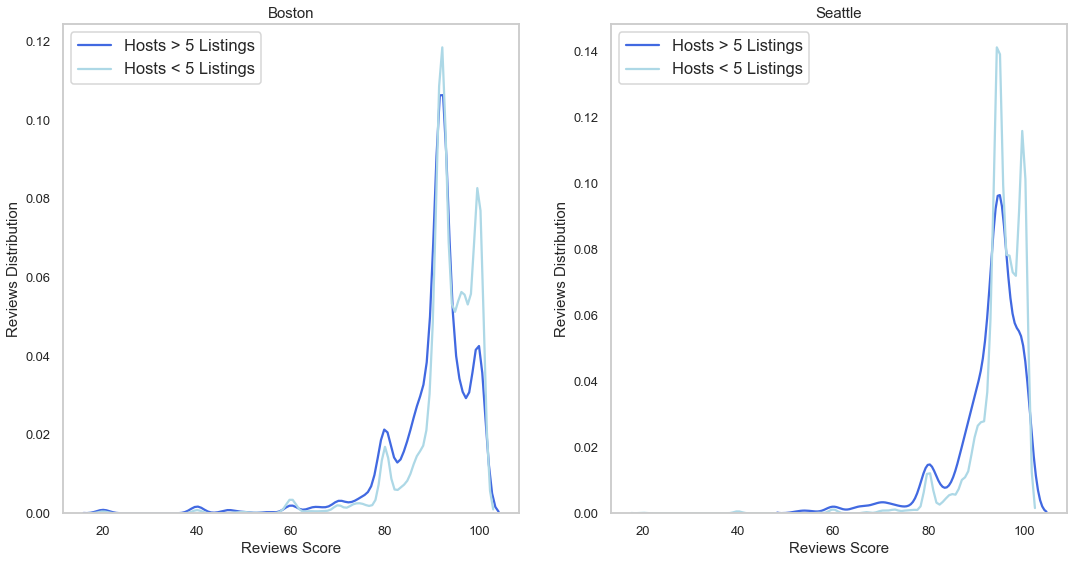

In [121]:
#data of scores for Boston
df_boston_several_listings = df_boston_listings_limited[df_boston_listings_limited.several_listings == True] \
                                                                                    ['review_scores_rating']
df_boston_not_several_listings = df_boston_listings_limited[df_boston_listings_limited.several_listings == False] \
                                                                                    ['review_scores_rating']
#data of scores for Seattle
df_seattle_several_listings = df_seattle_listings_limited[df_seattle_listings_limited.several_listings == True] \
                                                                                    ['review_scores_rating']
df_seattle_not_several_listings = df_seattle_listings_limited[df_seattle_listings_limited.several_listings == False] \
                                                                                    ['review_scores_rating']

fig = plt.figure(figsize=(18,9))
#first graph with the distribution os Boston
ax1 = fig.add_subplot(1, 2, 1)
sns.distplot(df_boston_several_listings, hist=False, rug=False, color = 'Royalblue',  kde_kws = {'label': 'Hosts > 5 Listings'})
sns.distplot(df_boston_not_several_listings, hist=False, rug=False, color = 'Lightblue',   kde_kws = {'label': 'Hosts < 5 Listings'})
ax1.set_ylabel("Reviews Distribution",fontsize=15)
ax1.set_xlabel("Reviews Score",fontsize=15)
ax1.tick_params(axis="x", labelsize=13)
ax1.tick_params(axis="y", labelsize=13)
ax1.set_title("Boston", fontsize=15)

#second graph with the distribution os Seattle
ax2 = fig.add_subplot(1, 2, 2)
sns.distplot(df_seattle_several_listings, 
             hist=False, 
             rug=False, 
             color = 'Royalblue', 
             kde_kws = {'label': 'Hosts > 5 Listings'})
sns.distplot(df_seattle_not_several_listings, 
             hist=False, 
             rug=False, 
             color = 'Lightblue',  
             kde_kws = {'label': 'Hosts < 5 Listings'});
ax2.set_ylabel("Reviews Distribution",fontsize=15)
ax2.set_xlabel("Reviews Score",fontsize=15)
ax2.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)
ax2.set_title("Seattle", fontsize=15);


Now we draw a graph comparing the availability in 365 days between the hosts with more than 5 listings and less than five listings.

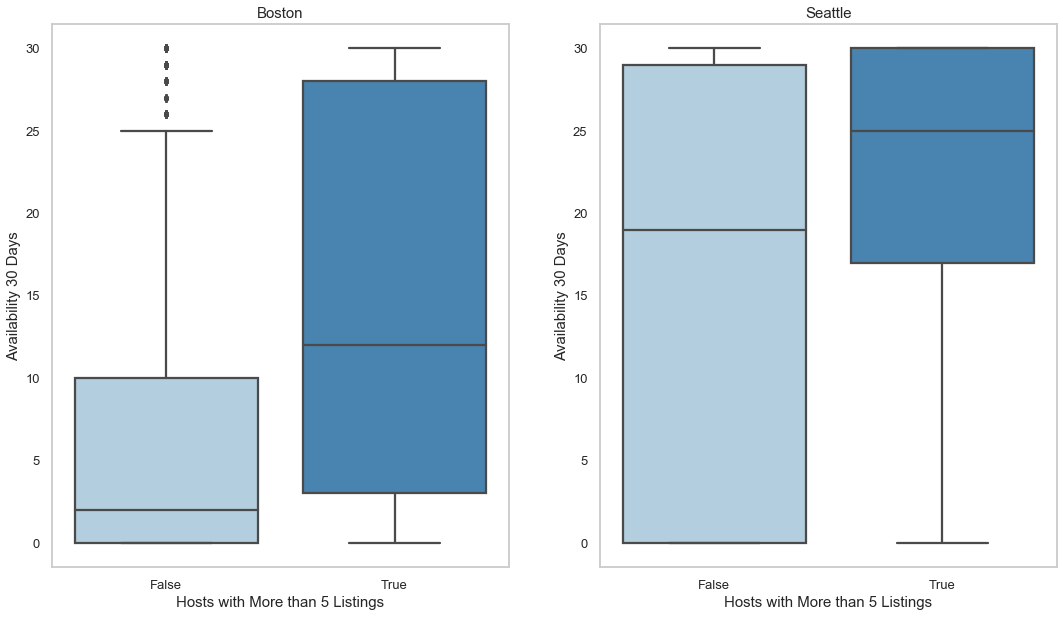

In [122]:
plt.subplots(figsize=(18,10))
#Boxplot with the distribution of the availability in the hosts of Boston
plt.subplot(1, 2, 1)
ax = sns.boxplot(x=df_boston_listings_limited.several_listings, 
                 y=df_boston_listings_limited.availability_30, 
                 palette="Blues")

ax.set_xlabel("Hosts with More than 5 Listings",fontsize=15)
ax.set_ylabel("Availability 30 Days",fontsize=15)
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_title("Boston", fontsize=15)

#Boxplot with the distribution of the availability in the hosts of Seattle
plt.subplot(1, 2, 2)
ax = sns.boxplot(x=df_seattle_listings_limited.several_listings, 
                 y=df_seattle_listings_limited.availability_30, 
                 palette="Blues")

ax.set_xlabel("Hosts with More than 5 Listings",fontsize=15)
ax.set_ylabel("Availability 30 Days",fontsize=15)
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_title("Seattle", fontsize=15);

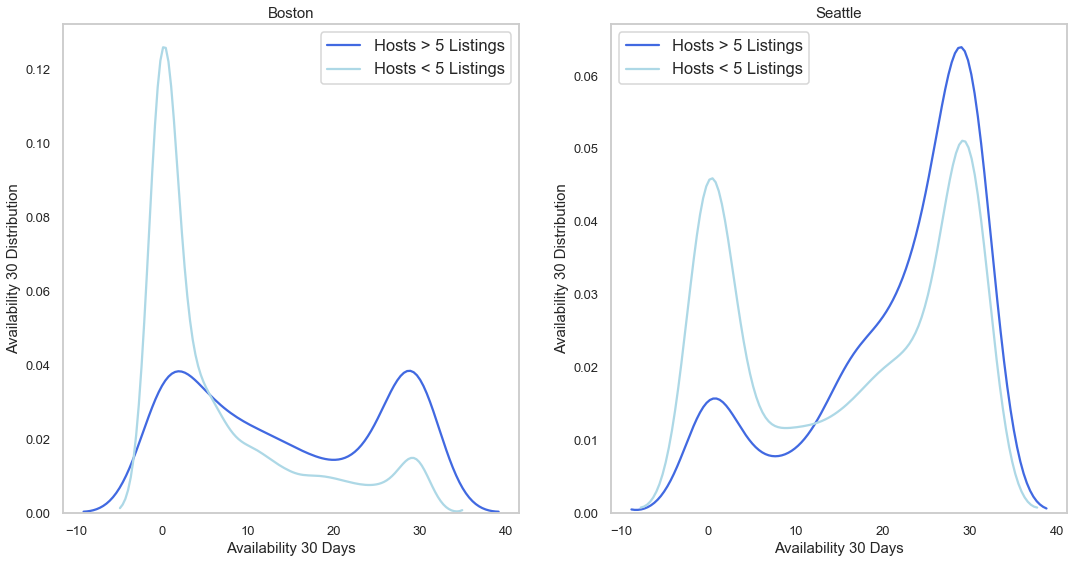

In [123]:
#data of availabilities for Boston
df_boston_several_listings = df_boston_listings_limited[df_boston_listings_limited.several_listings == True] \
                                                                                    ['availability_30']
df_boston_not_several_listings = df_boston_listings_limited[df_boston_listings_limited.several_listings == False] \
                                                                                    ['availability_30']
#data of availabilities for Seattle
df_seattle_several_listings = df_seattle_listings_limited[df_seattle_listings_limited.several_listings == True] \
                                                                                    ['availability_30']
df_seattle_not_several_listings = df_seattle_listings_limited[df_seattle_listings_limited.several_listings == False] \
                                                                                    ['availability_30']

fig = plt.figure(figsize=(18,9))
#first graph with the distribution os Boston
ax1 = fig.add_subplot(1, 2, 1)
sns.distplot(df_boston_several_listings, hist=False, rug=False, color = 'Royalblue',  kde_kws = {'label': 'Hosts > 5 Listings'})
sns.distplot(df_boston_not_several_listings, hist=False, rug=False, color = 'Lightblue',   kde_kws = {'label': 'Hosts < 5 Listings'})
ax1.set_ylabel("Availability 30 Distribution",fontsize=15)
ax1.set_xlabel("Availability 30 Days",fontsize=15)
ax1.tick_params(axis="x", labelsize=13)
ax1.tick_params(axis="y", labelsize=13)
ax1.set_title("Boston", fontsize=15)

#second graph with the distribution os Seattle
ax2 = fig.add_subplot(1, 2, 2)
sns.distplot(df_seattle_several_listings, 
             hist=False, 
             rug=False, 
             color = 'Royalblue', 
             kde_kws = {'label': 'Hosts > 5 Listings'})
sns.distplot(df_seattle_not_several_listings, 
             hist=False, 
             rug=False, 
             color = 'Lightblue',  
             kde_kws = {'label': 'Hosts < 5 Listings'});
ax2.set_ylabel("Availability 30 Distribution",fontsize=15)
ax2.set_xlabel("Availability 30 Days",fontsize=15)
ax2.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)
ax2.set_title("Seattle", fontsize=15);

We do the same again, but dividing the hosts in those who are superhost and those that are normal hosts. In this case we have preferred to use violin plots.

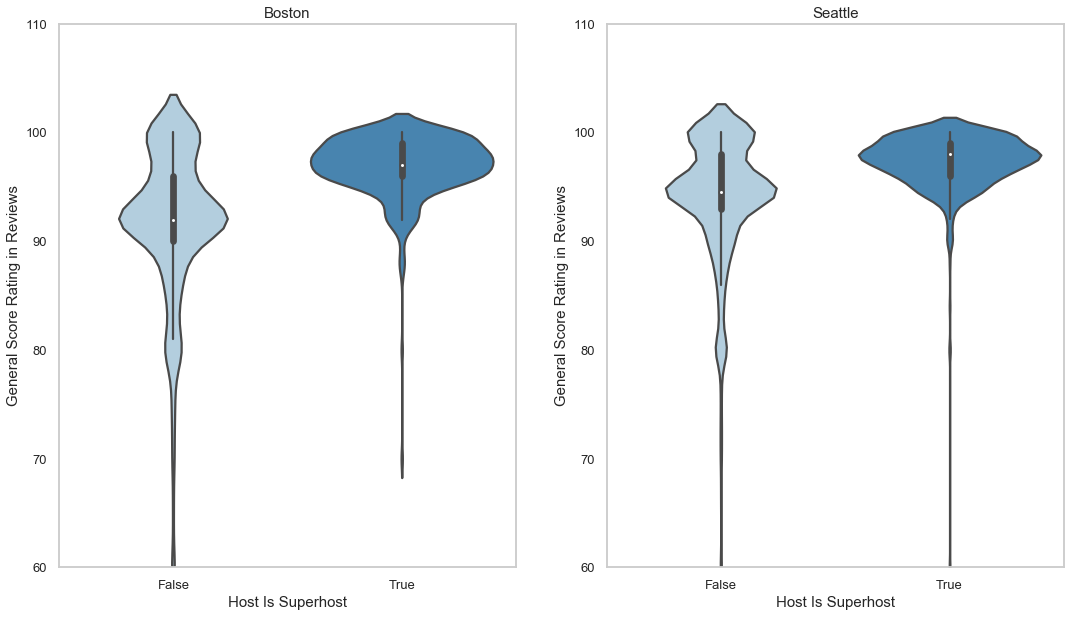

In [124]:
plt.subplots(figsize=(18,10))

#Violin plot with the general score rating in Boston for superhosts and normal hosts
plt.subplot(1, 2, 1)
ax = sns.violinplot(x=df_boston_listings_limited.host_is_superhost, 
                    y=df_boston_listings_limited.review_scores_rating, 
                    palette="Blues")
ax.set_xlabel("Host Is Superhost",fontsize=15)
ax.set_ylabel("General Score Rating in Reviews",fontsize=15)
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_title("Boston", fontsize=15)
ax.set(ylim=(60, 110));

#Violin plot with the general score rating in Seattle for superhosts and normal hosts
plt.subplot(1, 2, 2)
ax = sns.violinplot(x=df_seattle_listings_limited.host_is_superhost, 
                    y=df_seattle_listings_limited.review_scores_rating, 
                    palette="Blues")
ax.set_xlabel("Host Is Superhost",fontsize=15)
ax.set_ylabel("General Score Rating in Reviews",fontsize=15)
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_title("Seattle", fontsize=15)
ax.set(ylim=(60, 110));

And we repeat the same again with the availability in 30 days for superhosts and normal hosts.

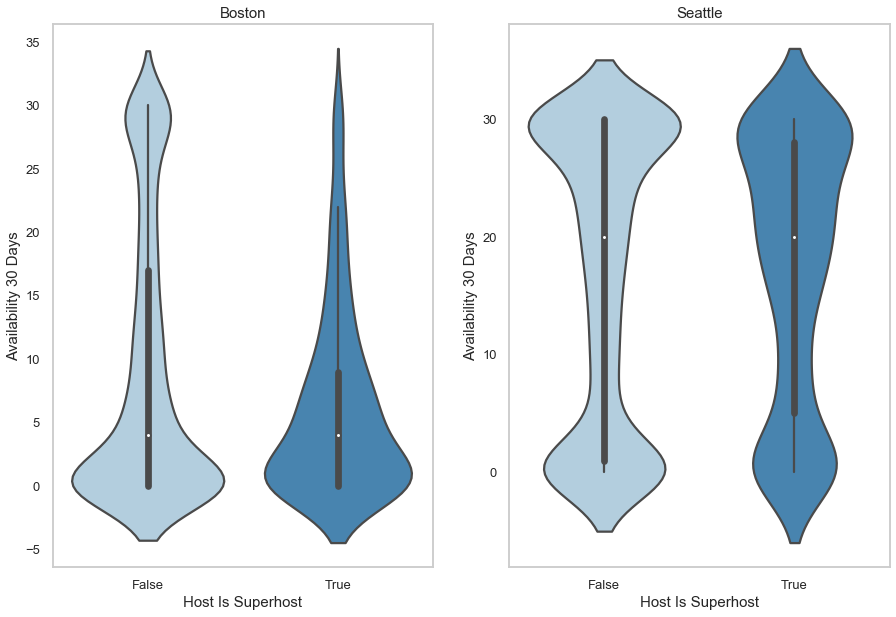

In [125]:
plt.subplots(figsize=(15,10))

#Violin plot with the availability in Boston for superhosts and normal hosts
plt.subplot(1, 2, 1)
ax = sns.violinplot(x=df_boston_listings_limited.host_is_superhost, 
                 y=df_boston_listings_limited.availability_30, 
                 palette="Blues")

ax.set_xlabel("Host Is Superhost",fontsize=15)
ax.set_ylabel("Availability 30 Days",fontsize=15)
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_title("Boston", fontsize=15)

#Violin plot with the availability in Seattle for superhosts and normal hosts
plt.subplot(1, 2, 2)
ax = sns.violinplot(x=df_seattle_listings_limited.host_is_superhost, 
                 y=df_seattle_listings_limited.availability_30, 
                 palette="Blues")

ax.set_xlabel("Host Is Superhost",fontsize=15)
ax.set_ylabel("Availability 30 Days",fontsize=15)
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_title("Seattle", fontsize=15);

Finally, we take a look of the scores in each case of review for the hosts with more than 5 listings and the hosts with less listings. We draw two graphs, one for Boston and one for Seattle.

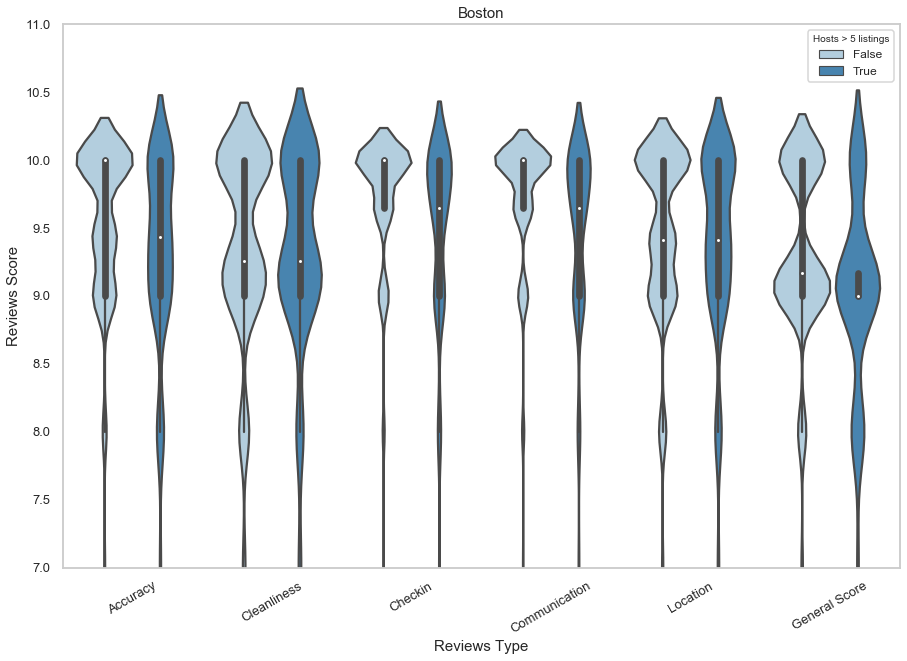

In [126]:
# It prepares an auxiliar data frame with three colums "several_listings" (True or False), "Reviews" (categorical
# variable with the type of review) and "Score" (value of the revies)
# doing this we can plot all the violin plots in a single graph using the column "several_listings" as hue variable.

df_aux = pd.melt(df_boston_listings_limited[['several_listings', 
                                              'review_scores_accuracy',
                                              'review_scores_cleanliness',
                                              'review_scores_checkin', 
                                              'review_scores_communication',
                                              'review_scores_location',
                                              'review_scores_value']], 
                  "several_listings", var_name="Reviews", value_name="Score")


plt.figure(figsize = (15,10))
ax = sns.violinplot(x="Reviews", hue="several_listings", y="Score", data=df_aux, palette="Blues")
ax.set(ylim=(7, 11))
ax.set_xticklabels(['Accuracy', 'Cleanliness', 'Checkin', 'Communication', 'Location', 'General Score'])
ax.set_xlabel("Reviews Type",fontsize=15)
ax.set_ylabel("Reviews Score",fontsize=15)
ax.legend(title = "Hosts > 5 listings", prop={'size':'large'}, loc='upper right', fontsize='13')
ax.set_title("Boston", fontsize=15)
plt.xticks(fontsize=13, rotation='30')
plt.yticks(fontsize=13);


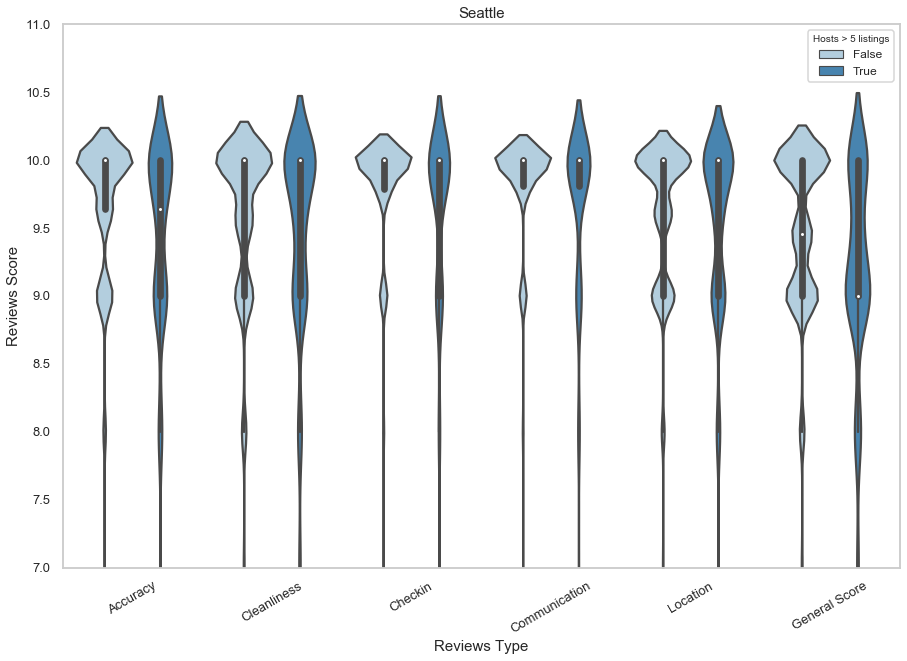

In [127]:
# The same proceddure as in the step before but for Seattle
df_long = pd.melt(df_seattle_listings_limited[['several_listings', 
                                              'review_scores_accuracy',
                                              'review_scores_cleanliness',
                                              'review_scores_checkin', 
                                              'review_scores_communication',
                                              'review_scores_location',
                                              'review_scores_value']], 
                  "several_listings", var_name="a", value_name="c")

plt.subplots(figsize=(15,10))
ax = sns.violinplot(x="a", hue="several_listings", y="c", data=df_long, palette="Blues")
ax.set(ylim=(7, 11))

ax.set_xticklabels(['Accuracy', 'Cleanliness', 'Checkin', 'Communication', 'Location', 'General Score'])
ax.set_xlabel("Reviews Type",fontsize=15)
ax.set_ylabel("Reviews Score",fontsize=15)
ax.legend(title = "Hosts > 5 listings", prop={'size':'large'}, loc='upper right', fontsize='13')
ax.set_title("Seattle", fontsize=15)
plt.xticks(fontsize=13, rotation='30')
plt.yticks(fontsize=13);


#### Conclusions:

We can extract the following conclusions from the graphs avobe:

* Those hosts with more than five listings usually have worse reviews than the hosts with less listings. This occurs both in Boston and in Seattle. Maybe because of this or because they have to manage a greater number of houses the hosts with more listings have often more availability along the year.


* Analyzing each type of review separately, we have seen that the hosts with more than 5 listings usually have worse scores in all the reviews in Seattle, while they have more similar values in terms of cleanliness in Boston. 


* The superhost program is a recognition that Airbnb grants to some hosts that meet a series of quality conditions, such as high rating in reviews, low cancellation rate, high response rate, etc. According to this is normal that we have seen a clear better general score in the reviews, whereas the difference with other hosts is not so obvious in terms of availability. In Seattle the availability in a year is almost the same for normal hosts and superhosts, while in Boston superhosts have a little more days of availability per year, but the distribution is similar in both groups.

<a id='diff_features'></a>
### Question 2: Differences in the features between both cities


<a id='amenities'></a>
### 'amenities':

Now we are going to study the differences between Seattle and Boston regarding the amenities published in the listings. We will follow a similar procedure to the verifications analysis.

In [128]:
#It calculates a series with the mean for all the amenities in Boston
boston_amenities_means = df_boston_listings_limited[boston_amenities_columns].mean()
boston_amenities_means.name = 'boston_amenities_means'

#It calculates a series with the mean for all the amenities in Seattle
seattle_amenities_means = df_seattle_listings_limited[seattle_amenities_columns].mean()
seattle_amenities_means.name = 'seattle_amenities_means'

In [129]:
#It concatenetes both series above in a singles dataframe
comp_df = pd.concat([boston_amenities_means, seattle_amenities_means], axis=1, sort=False)
comp_df = comp_df.fillna(0)

#It calculates the difference between Boston and Seattle
comp_df['mean_difference'] = comp_df.boston_amenities_means - comp_df.seattle_amenities_means
comp_df.index.names = ['Amenity']

#We only get those amenities with a percentage greater than 30%. They are a lot, so we only plot the more relevant.
comp_df = comp_df[(comp_df.boston_amenities_means > 0.3) | (comp_df.seattle_amenities_means > 0.3)]
comp_df = comp_df.sort_values(by='mean_difference', ascending=False)
comp_df = comp_df.rename(columns={'boston_amenities_means': 'Boston Means', 
                        'seattle_amenities_means': 'Seattle Means', 
                        'mean_difference': 'Mean_Boston_Minus_Mean_Seattle'})

#It adds a style bar with the values of the difference.
comp_df.style.bar(subset=['Mean_Boston_Minus_Mean_Seattle'], align='mid', color=['#d65f5f', '#5fba7d'])

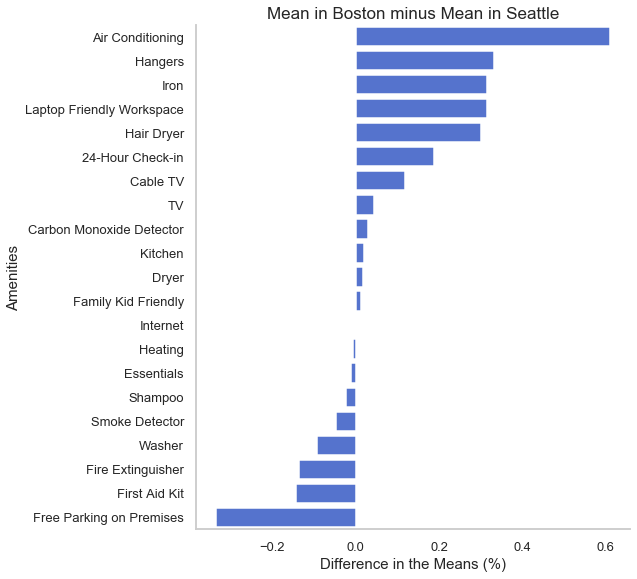

In [130]:
comp_df = comp_df.reset_index()

comp_df['Amenity'] = comp_df['Amenity'].str.replace('amenities_', '').str.replace('_', ' ')

ax = sns.catplot(x='Mean_Boston_Minus_Mean_Seattle',
                 y='Amenity', 
                 data=comp_df, 
                 kind='bar', 
                 height=8, 
                 aspect=1.2, 
                 color="Royalblue");
plt.xlabel('Difference in the Means (%)', fontsize=15)
plt.ylabel('Amenities', fontsize=15)
plt.title('Mean in Boston minus Mean in Seattle', fontsize=17);
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);


#### Conclusions:

* Air Conditioning is a lot more popular in Boston than in Seattle. About a 80% of lodgings have this amenity in Boston, compared to 17% in Seattle


* Hangers, Laptop Friendly Workspace, Iron, Hair Dryer and 24-Hour_Check-in	are also significativaly more common in Boston than in Seattle. They are a 30% more usual in Boston.


* Free Parking on Premises is more than a 30% more frequent in Seattle than in Boston.


* In Seattle the hosts publish First Aid Kit and Fire Extiguisher over a 10% more than the hosts of Boston.

We would like to analyse also how often the different amenities are published in the listings, but comparing the behaviour in different neighborhood groups. To know what amenities are more frequent in the more expensive neighbourhoods and what in the cheaper ones. Could we also see any difference between these groups in Boston and Seattle?


To see this we have defined an auxiliary function `prepare_feature_by_neighbourhood`. It recives the dataframe for Boston and Seatle with the dummy columns we want to compare. It returns a newe dataframe with the mean of this columns for each neighbourhood group and for each city. It shows us also the difference between the two cities.

Now we are going to draw the results for the amenities in a  multiple bar plot.

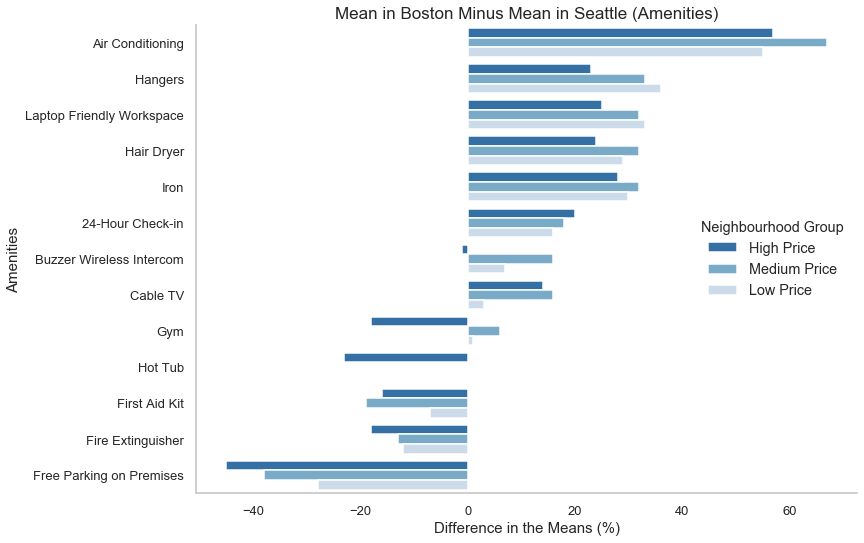

In [131]:
#we call function prepare_feature_by_neighbourhood to prepare a dataframe with the 
#mean of each amenitie by neighbourhood group and the difference between Boston and Seattle.
comp_df = prepare_feature_by_neighbourhood(df_boston_listings_limited,
                                          df_seattle_listings_limited,
                                          boston_amenities_columns,
                                          seattle_amenities_columns,
                                          "Amenities",
                                          15)

#We change the names of the amenities
comp_df['Amenities'] = comp_df['Amenities'].str.replace('amenities_', '').str.replace('_', ' ')
comp_df['Amenities'] = comp_df['Amenities'].str.replace('amenities_', '').str.replace('_', ' ')
#Change the name of the neighbourhood groups
comp_df['neighbourhood_group'] = comp_df['neighbourhood_group'].str.replace('_', ' ').str.title()
#depict a catplot with the neighbourhood group as the hue variable 
ax = sns.catplot(x='percentage_diff', 
                y='Amenities', 
                hue='neighbourhood_group', 
                data=comp_df, kind='bar', 
                height=7.5, 
                aspect=1.7, 
                palette="Blues_r",
                legend=False);

#adapt the labels, title, legend, etc.
plt.xlabel('Difference in the Means (%)', fontsize=15)
plt.ylabel('Amenities', fontsize=15)
plt.title('Mean in Boston Minus Mean in Seattle (Amenities)', fontsize=17)
plt.legend(title= "Neighbourhood Group", title_fontsize = 'x-large', loc= 'center right', fontsize = 'x-large', frameon = False)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);


#### Conclusions:

* In general, the three neighbourhood groups follow the same tendency. Normally, the amenities are more frequent or less frequent in a city in the three categories. The execption is the gyms, that are less frequent in the high priced neighbourhoods in Boston (about a 16%), but equal or more frequent in the medium and low priced neighbourhoods. We can see also that Hot Tub is also around a 16% less announced in Boston in the high priced neighbourhoods, while in the other neighbourhoods the percentage is almost the same. On the other hand Buzzer Wireles Intercom is more published in Boston than in Seattle for the Medium and Low priced neighbourhoods, while it is almos the same for the more expensive neighbourhoods.


* Air Conditioning is again the amenity with the highest increment between Boston to Seattle, but the biggest value occurs in the medium neighbourhoods with a 66% of increment.


* On the other hand, Free Parking on Premises is also the amenity with the highest decrement between Boston to Seattle, but we can see that this difference is specially important in the High Price neighbourhoods with a 52%, while in the small priced neighbourhoods the difference is much smaller with a 28%.

<a id='host_verifications'></a>
### 'host_verifications':

Is there some difference between the means used to do the verification in Seattle and in Boston?

In [132]:
#It calculates a series with the mean for all the verification types in Boston
boston_verification_columns = ['verification_' + s for s in boston_verifications_set]
boston_verif_means = df_boston_listings_limited[boston_verification_columns].mean()
boston_verif_means.name = 'boston_verif_means'
boston_verif_means

verification_reviews           0.927697
verification_linkedin          0.023057
verification_google            0.029320
verification_phone             0.997153
verification_manual_offline    0.044976
verification_facebook          0.174210
verification_jumio             0.403074
verification_manual_online     0.022203
verification_amex              0.023342
verification_sent_id           0.000854
verification_weibo             0.002277
verification_email             0.974666
verification_kba               0.360945
Name: boston_verif_means, dtype: float64

In [133]:
#It calculates a series with the mean for all the verification types in Seattle
seattle_verification_columns = ['verification_' + s for s in seattle_verifications_set]
seattle_verif_means = df_seattle_listings_limited[seattle_verification_columns].mean()
seattle_verif_means.name = 'seattle_verif_means'
seattle_verif_means

verification_reviews           0.930116
verification_linkedin          0.232859
verification_google            0.195675
verification_phone             0.993407
verification_manual_offline    0.013449
verification_facebook          0.504219
verification_jumio             0.338080
verification_manual_online     0.003428
verification_amex              0.006593
verification_sent_id           0.002110
verification_weibo             0.001319
verification_email             0.971519
verification_kba               0.474947
verification_photographer      0.001055
Name: seattle_verif_means, dtype: float64

In [134]:
#It concatenetes both series above in a singles dataframe
comp_df = pd.concat([boston_verif_means, seattle_verif_means], axis=1, sort=False)
comp_df = comp_df.fillna(0)

#It calculates the difference between Boston and Seattle
comp_df['mean_difference'] = ((comp_df.boston_verif_means - comp_df.seattle_verif_means)*100).astype(int)
comp_df.index.names = ['Type']
comp_df = comp_df.sort_values(by='mean_difference', ascending=False)
comp_df = comp_df.rename(columns={'boston_verif_means': 'Boston Means', 
                        'seattle_verif_means': 'Seattle Means', 
                        'mean_difference': 'Mean_Boston_Minus_Mean_Seattle'})

#It adds a style bar with the values of the difference.
comp_df.style.bar(subset=['Mean_Boston_Minus_Mean_Seattle'], align='zero', color=['#d65f5f', '#5fba7d'])

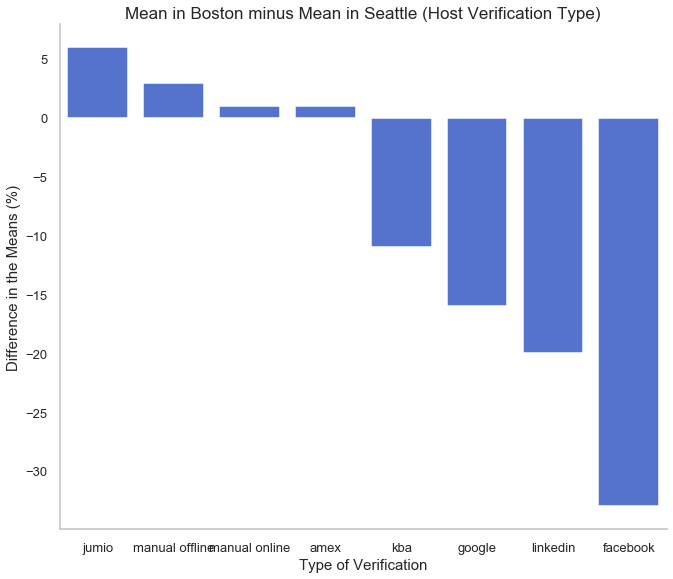

In [135]:
comp_df = comp_df.reset_index()
comp_df = comp_df[abs(comp_df.Mean_Boston_Minus_Mean_Seattle) > 0]
comp_df['Type'] = comp_df['Type'].str.replace('verification_', '').str.replace('_', ' ')

ax = sns.catplot(x='Type',
                 y='Mean_Boston_Minus_Mean_Seattle',
                 data=comp_df, 
                 kind='bar', 
                 height=8, 
                 aspect=1.2, 
                 color="Royalblue");
plt.ylabel('Difference in the Means (%)', fontsize=15)
plt.xlabel('Type of Verification', fontsize=15)
plt.title('Mean in Boston minus Mean in Seattle (Host Verification Type)', fontsize=17);
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

We are going to take a look but considering also the neighbourhood groups.

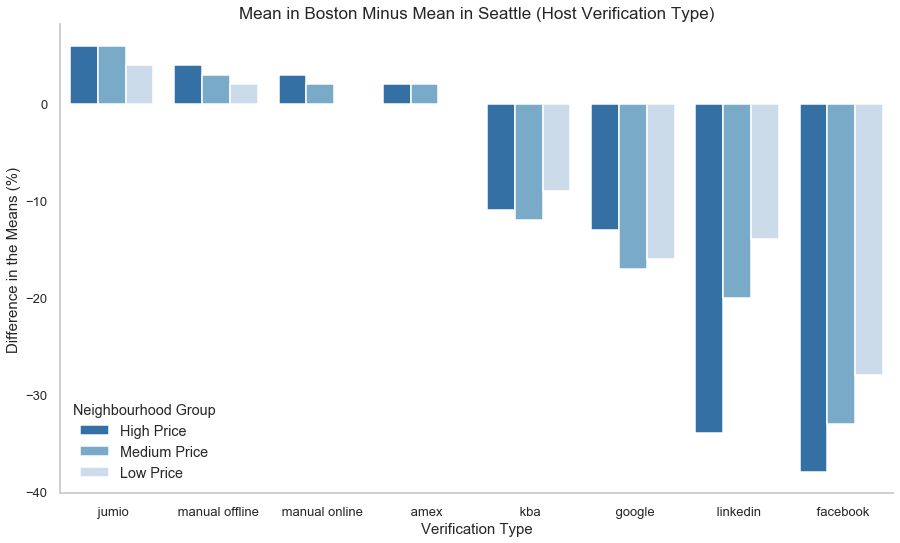

In [136]:
#we call function prepare_feature_by_neighbourhood to prepare a dataframe with the 
#mean of each verification type by neighbourhood group and the difference between Boston and Seattle.

comp_df = prepare_feature_by_neighbourhood(df_boston_listings_limited,
                                          df_seattle_listings_limited,
                                          boston_verification_columns,
                                          seattle_verification_columns,
                                          "Verification Type",
                                          1)

#We change the names of the Verification Types
comp_df['Verification Type'] = comp_df['Verification Type'].str.replace('verification', '').str.replace('_', ' ')
#Change the name of the neighbourhood groups
comp_df['neighbourhood_group'] = comp_df['neighbourhood_group'].str.replace('_', ' ').str.title()
#depict a catplot with the neighbourhood group as the hue variable 
ax = sns.catplot(x='Verification Type', 
                y='percentage_diff', 
                hue='neighbourhood_group', 
                data=comp_df, kind='bar', 
                height=7.5, 
                aspect=1.7, 
                palette="Blues_r",
                legend=False);

#adapt the labels, title, legend, etc.
plt.ylabel('Difference in the Means (%)', fontsize=15)
plt.xlabel('Verification Type', fontsize=15)
plt.title('Mean in Boston Minus Mean in Seattle (Host Verification Type)', fontsize=17)
plt.legend(title= "Neighbourhood Group", title_fontsize = 'x-large', loc= 'botton right', fontsize = 'x-large', frameon = False)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

#### Conclusions:

* Most of the listings are verified by email, by the reviews or by phone, both in Boston and in Seattle.


* I don't know the reason, but kba, google, linkedin and facebook are significativaly less used to do verifications in Boston. This difference is bigger in the high priced neighbourhoods than in the others.


* Jumio is a 6.5 % more used in Boston than in Seattle.

<a id='property_type'></a>
### Property Type:

In [137]:
#It calculates a series with the mean for all the verification types in Boston
boston_property_means = df_boston_listings_limited[boston_property_type_cols].mean()
boston_property_means.name = 'boston_property_means'
boston_property_means

property_type_Apartment          0.729576
property_type_Bed & Breakfast    0.011102
property_type_Boat               0.003416
property_type_Camper/RV          0.000285
property_type_Condominium        0.065186
property_type_Dorm               0.000569
property_type_Entire Floor       0.001139
property_type_Guesthouse         0.000285
property_type_House              0.156846
property_type_Loft               0.010817
property_type_Other              0.004839
property_type_Townhouse          0.014233
property_type_Villa              0.001708
Name: boston_property_means, dtype: float64

In [138]:
#It calculates a series with the mean for all the verification types in Seattle
seattle_property_means = df_seattle_listings_limited[seattle_property_type_cols].mean()
seattle_property_means.name = 'seattle_property_means'
seattle_property_means

property_type_Apartment          0.448840
property_type_Bed & Breakfast    0.009494
property_type_Boat               0.001319
property_type_Bungalow           0.003428
property_type_Cabin              0.005538
property_type_Camper/RV          0.003428
property_type_Chalet             0.000527
property_type_Condominium        0.023470
property_type_Dorm               0.000527
property_type_House              0.453586
property_type_Loft               0.010549
property_type_Other              0.005802
property_type_Tent               0.001319
property_type_Townhouse          0.031118
property_type_Treehouse          0.000791
property_type_Yurt               0.000264
Name: seattle_property_means, dtype: float64

In [139]:
#It concatenetes both series above in a singles dataframe
comp_df = pd.concat([boston_property_means, seattle_property_means], axis=1, sort=False)
comp_df = comp_df.fillna(0)

#It calculates the difference between Boston and Seattle
comp_df['mean_difference'] = ((comp_df.boston_property_means - comp_df.seattle_property_means)*100).astype(int)
comp_df.index.names = ['Type']
comp_df = comp_df.sort_values(by='mean_difference', ascending=False)
comp_df = comp_df.rename(columns={'boston_property_means': 'Boston Means', 
                        'seattle_property_means': 'Seattle Means', 
                        'mean_difference': 'Mean_Boston_Minus_Mean_Seattle'})

#It adds a style bar with the values of the difference.
comp_df.style.bar(subset=['Mean_Boston_Minus_Mean_Seattle'], align='zero', color=['#d65f5f', '#5fba7d'])

In [140]:
#comp_df = comp_df[abs(comp_df.Mean_Boston_Minus_Mean_Seattle) > 0.01]

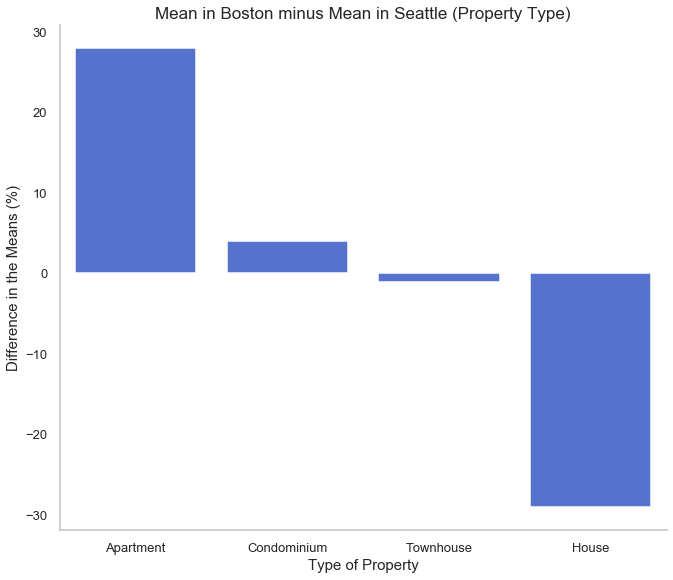

In [141]:
comp_df = comp_df.reset_index()
comp_df = comp_df[abs(comp_df.Mean_Boston_Minus_Mean_Seattle) > 0]
comp_df['Type'] = comp_df['Type'].str.replace('property_type_', '').str.replace('_', ' ')

ax = sns.catplot(x='Type',
                 y='Mean_Boston_Minus_Mean_Seattle',
                 data=comp_df, 
                 kind='bar', 
                 height=8, 
                 aspect=1.2, 
                 color="Royalblue");
plt.ylabel('Difference in the Means (%)', fontsize=15)
plt.xlabel('Type of Property', fontsize=15)
plt.title('Mean in Boston minus Mean in Seattle (Property Type)', fontsize=17);
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

Let's take again a look considering the neighbourhood groups.

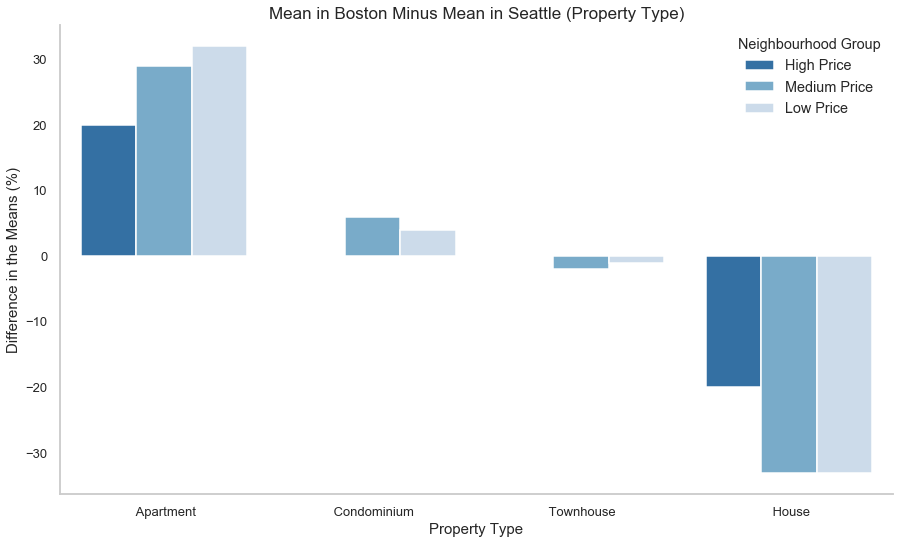

In [142]:
#we call function prepare_feature_by_neighbourhood to prepare a dataframe with the 
#mean of each property type by neighbourhood group and the difference between Boston and Seattle.
comp_df = prepare_feature_by_neighbourhood(df_boston_listings_limited,
                                          df_seattle_listings_limited,
                                          boston_property_type_cols,
                                          seattle_property_type_cols,
                                          "Property Type",
                                          1)

#We change the names of the property types
comp_df['Property Type'] = comp_df['Property Type'].str.replace('property_type', '').str.replace('_', ' ')
#Change the name of the neighbourhood groups
comp_df['neighbourhood_group'] = comp_df['neighbourhood_group'].str.replace('_', ' ').str.title()
#depict a catplot with the neighbourhood group as the hue variable 
ax = sns.catplot(y='percentage_diff', 
                x='Property Type', 
                hue='neighbourhood_group', 
                data=comp_df, kind='bar', 
                height=7.5, 
                aspect=1.7, 
                palette="Blues_r",
                legend=False);

#adapt the labels, title, legend, etc.
plt.ylabel('Difference in the Means (%)', fontsize=15)
plt.xlabel('Property Type', fontsize=15)
plt.title('Mean in Boston Minus Mean in Seattle (Property Type)', fontsize=17)
plt.legend(title= "Neighbourhood Group", title_fontsize = 'x-large', loc= 'upper right', fontsize = 'x-large', frameon = False)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

#### Conclusions:

* Apartments are about a 30% more common in Boston than in Seattle and Houses are about a 30% more frequent in Seattle than in Boston. In this case the differences are bigger in the low and medium priced neighbourhoods. The other property types are very similar.

<a id='room_type'></a>
### Room Type:

In [143]:
#It calculates a series with the mean for all the verification types in Boston
boston_room_means = df_boston_listings_limited[boston_room_type_cols].mean()
boston_room_means.name = 'boston_room_means'
boston_room_means

room_type_Entire home/apt    0.594079
room_type_Private room       0.383433
room_type_Shared room        0.022488
Name: boston_room_means, dtype: float64

In [144]:
#It calculates a series with the mean for all the verification types in Seattle
seattle_room_means = df_seattle_listings_limited[seattle_room_type_cols].mean()
seattle_room_means.name = 'seattle_room_means'
seattle_room_means

room_type_Entire home/apt    0.664030
room_type_Private room       0.305116
room_type_Shared room        0.030854
Name: seattle_room_means, dtype: float64

In [145]:
#It concatenetes both series above in a singles dataframe
comp_df = pd.concat([boston_room_means, seattle_room_means], axis=1, sort=False)
comp_df = comp_df.fillna(0)

#It calculates the difference between Boston and Seattle
comp_df['mean_difference'] = ((comp_df.boston_room_means - comp_df.seattle_room_means)*100).astype(int)
comp_df.index.names = ['Type']
comp_df = comp_df.sort_values(by='mean_difference', ascending=False)
comp_df = comp_df.rename(columns={'boston_room_means': 'Boston Means', 
                        'seattle_room_means': 'Seattle Means', 
                        'mean_difference': 'Mean_Boston_Minus_Mean_Seattle'})

#It adds a style bar with the values of the difference.
comp_df.style.bar(subset=['Mean_Boston_Minus_Mean_Seattle'], align='zero', color=['#d65f5f', '#5fba7d'])

In [146]:
#comp_df = comp_df[abs(comp_df.Mean_Boston_Minus_Mean_Seattle) > 0.01]

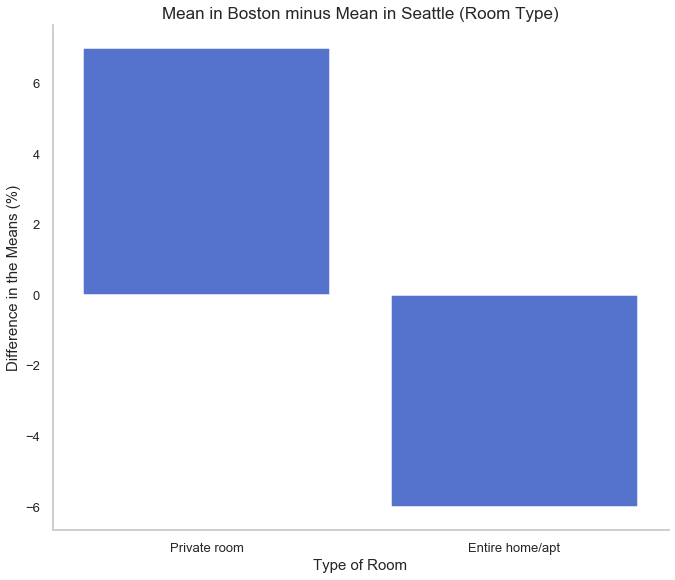

In [147]:
comp_df = comp_df.reset_index()
comp_df = comp_df[abs(comp_df.Mean_Boston_Minus_Mean_Seattle) > 0]
comp_df['Type'] = comp_df['Type'].str.replace('room_type_', '').str.replace('_', ' ')

ax = sns.catplot(y='Mean_Boston_Minus_Mean_Seattle',
                 x='Type', 
                 data=comp_df, 
                 kind='bar', 
                 height=8, 
                 aspect=1.2, 
                 color="Royalblue");
plt.ylabel('Difference in the Means (%)', fontsize=15)
plt.xlabel('Type of Room', fontsize=15)
plt.title('Mean in Boston minus Mean in Seattle (Room Type)', fontsize=17);
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

Let's see the data by neighbourhood group:

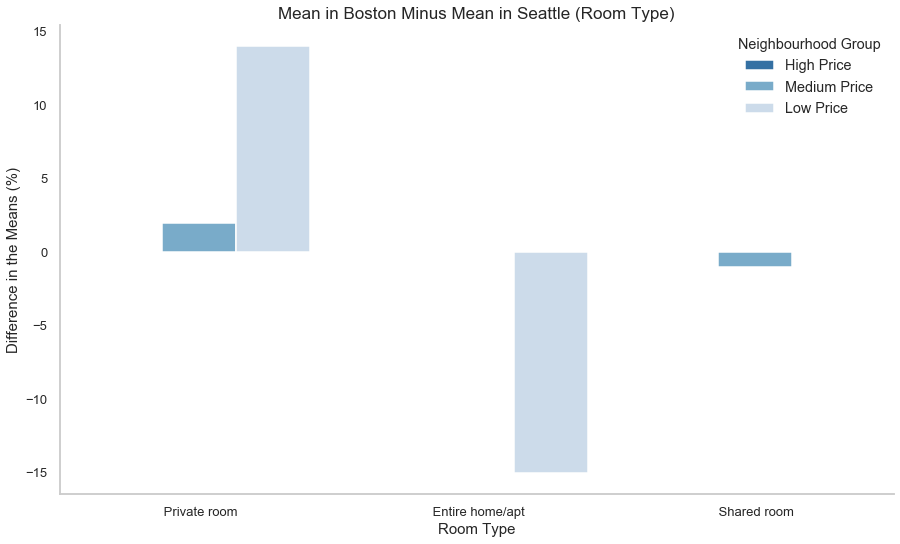

In [148]:
#we call function prepare_feature_by_neighbourhood to prepare a dataframe with the 
#mean of each room type by neighbourhood group and the difference between Boston and Seattle.
comp_df = prepare_feature_by_neighbourhood(df_boston_listings_limited,
                                          df_seattle_listings_limited,
                                          boston_room_type_cols,
                                          seattle_room_type_cols,
                                          "Room Type",
                                          0)


#We change the names of the room types
comp_df['Room Type'] = comp_df['Room Type'].str.replace('room_type', '').str.replace('_', ' ')
#Change the name of the neighbourhood groups
comp_df['neighbourhood_group'] = comp_df['neighbourhood_group'].str.replace('_', ' ').str.title()
#depict a catplot with the neighbourhood group as the hue variable 
ax = sns.catplot(y='percentage_diff', 
                x='Room Type', 
                hue='neighbourhood_group', 
                data=comp_df, kind='bar', 
                height=7.5, 
                aspect=1.7, 
                palette="Blues_r",
                legend=False);

#adapt the labels, title, legend, etc.
plt.ylabel('Difference in the Means (%)', fontsize=15)
plt.xlabel('Room Type', fontsize=15)
plt.title('Mean in Boston Minus Mean in Seattle (Room Type)'
 , fontsize=17)
plt.legend(title= "Neighbourhood Group", title_fontsize = 'x-large', loc= 'upper right', fontsize = 'x-large', frameon = False)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

#### Conclusions:

* Private Room is a 6% more usual in Boston than in Seattle and Entire home/apt is about a 6% more frequent int Seattle. This difference is almost exclusively due to the low price neighbourhoods. In this group the difference is close to a 15%.

<a id='bed_type'></a>
### Bed Type:

In [149]:
#It calculates a series with the mean for all the verification types in Boston
boston_bed_means = df_boston_listings_limited[boston_bed_type_cols].mean()
boston_bed_means.name = 'boston_bed_means'
boston_bed_means

bed_type_Airbed           0.011102
bed_type_Couch            0.002562
bed_type_Futon            0.014518
bed_type_Pull-out Sofa    0.008824
bed_type_Real Bed         0.962995
Name: boston_bed_means, dtype: float64

In [150]:
#It calculates a series with the mean for all the verification types in Seattle
seattle_bed_means = df_seattle_listings_limited[seattle_bed_type_cols].mean()
seattle_bed_means.name = 'seattle_bed_means'
seattle_bed_means

bed_type_Airbed           0.007120
bed_type_Couch            0.003428
bed_type_Futon            0.019515
bed_type_Pull-out Sofa    0.012395
bed_type_Real Bed         0.957542
Name: seattle_bed_means, dtype: float64

In [151]:
#It concatenetes both series above in a singles dataframe
comp_df = pd.concat([boston_bed_means, seattle_bed_means], axis=1, sort=False)
comp_df = comp_df.fillna(0)

#It calculates the difference between Boston and Seattle
comp_df['mean_difference'] = ((comp_df.boston_bed_means - comp_df.seattle_bed_means)*100).astype(int)
comp_df.index.names = ['Type']
comp_df = comp_df.sort_values(by='mean_difference', ascending=False)
comp_df = comp_df.rename(columns={'boston_bed_means': 'Boston Means', 
                        'seattle_bed_means': 'Seattle Means', 
                        'mean_difference': 'Mean_Boston_Minus_Mean_Seattle'})

#It adds a style bar with the values of the difference.
comp_df.style.bar(subset=['Mean_Boston_Minus_Mean_Seattle'], align='zero', color=['#d65f5f', '#5fba7d'])

There are no relevant differences here.

<a id='Geographical'></a>
### Question 3: Geographical Distribution

We would like to study the data from a geographical point of view. We are going to analyce in which neighbourhoods there are more listings, if the listings are concentrated in some areas and which is the distribution of the heighbourhood types (neighbourhoods with low, medium and high prices).

We are going to draw also the distribution of the hosts with several listings on the map (those hosts with more than 5 listings). Does this kind of hosts prefer some areas over others?

To answer this questions we will go to use scatter plots over a map of the cities.

First of all, we prepare two auxiliar dataframes grouping the original dataframes by `neighbourhood_cleansed` and `neighbourhood_group`. We take the mean for `total_price`, `several_listings`, `latitude` and `longitude`. The idea is that we can get an aproximation for the central point of a neighbourhood by making the mean for the `latitude` and `longitude` of his listings. Additionally we create a column with the `count` of listings by neighbourhood.

In [152]:
#auxiliar dataframe for Boston
df_boston_aux1 = df_boston_listings_limited.groupby(['neighbourhood_cleansed', 'neighbourhood_group']) \
       .agg({'total_price':'mean', 'several_listings': 'mean', 'latitude':'mean', 'longitude': 'mean', 'street':'size'}) \
       .rename(columns={'street':'Number of Listings'}) \
       .dropna().reset_index()
df_boston_aux1['Multiple Listings Hosts(%)'] = df_boston_aux1['several_listings'] * 100

#auxiliar dataframe for Seattle
df_seattle_aux1 = df_seattle_listings_limited.groupby(['neighbourhood_cleansed', 'neighbourhood_group']) \
       .agg({'total_price':'mean', 'several_listings': 'mean', 'latitude':'mean', 'longitude': 'mean', 'street':'size'}) \
       .rename(columns={'street':'Number of Listings'}) \
       .dropna().reset_index()
df_seattle_aux1['Multiple Listings Hosts(%)'] = df_seattle_aux1['several_listings'] * 100

In [153]:
df_seattle_aux1.head()

neighbourhood_cleansed neighbourhood_group  total_price  several_listings  \
0                  Adams        medium_price   172.285714          0.014286   
1                   Alki          high_price   245.428571          0.095238   
2          Arbor Heights        medium_price   173.600000          0.000000   
3               Atlantic           low_price   151.339623          0.037736   
4               Belltown          high_price   224.666667          0.451754   

    latitude   longitude  Number of Listings  Multiple Listings Hosts(%)  
0  47.671506 -122.386485                70.0                    1.428571  
1  47.575052 -122.408047                42.0                    9.523810  
2  47.510429 -122.381931                 5.0                    0.000000  
3  47.595164 -122.305620                53.0                    3.773585  
4  47.615132 -122.345610               228.0                   45.175439

The map was obtained from [OpenStreetMap.org](https://www.openstreetmap.org/#map=12/47.5957/-122.3307). We need to define a box with the máximum and minimun coordenates to export it.

In [154]:
#Máximum and minimum coordenates for Seattle
box_seattle = (df_seattle_aux1.longitude.min() - 0.02, df_seattle_aux1.longitude.max() + 0.02,      
         df_seattle_aux1.latitude.min() - 0.02, df_seattle_aux1.latitude.max() + 0.02)
box_seattle

(-122.42804660771235,
 -122.23846810286278,
 47.490429428599285,
 47.74576088562655)

In [155]:
#I assign them in a tuple anyway in the case I try to depict a  different number of points. 
#These coordenates must be the same to the ones used to download the map. 
box_seattle = (-122.42804660771235, -122.23846810286278,  47.490429428599285, 47.74576088562655)

In [156]:
#Máximum and minimum coordenates for Boston
box_boston = (df_boston_aux1.longitude.min() - 0.02, df_boston_aux1.longitude.max() + 0.02,      
         df_boston_aux1.latitude.min() - 0.02, df_boston_aux1.latitude.max() + 0.02)
box_boston

(-71.17615692036932, -71.0104530586998, 42.2353848557448, 42.39922689200064)

In [157]:
box_boston = (-71.17626069937037, -71.01063865996565, 42.2353848557448, 42.39921565750564)

We have defined a function (`scatter_map`) in `auxiliary_functions.py` that it will help us to draw the plots. This function receives the dataframe with the data, the picture with the map, the max and min coordenates of the map, the column with the classes of neighbourhoods to be drawed with different colors and the column that detemines the size of the points.

Additionally, we give an scale_size factor to multiply by the values in the column used for the size, to adapt and make them more visible. annot_limit specifies the minimum value of the size column to write the name of the neighbourhood in the point, if we don't want to write all the names of the neighbourhoods in the map.

We are going to draw the result for the neighbourhood groups distribution in Boston. The color of the points is determined by the neighbourhood group. The size is determined by the count of listings in every neighbourhood.

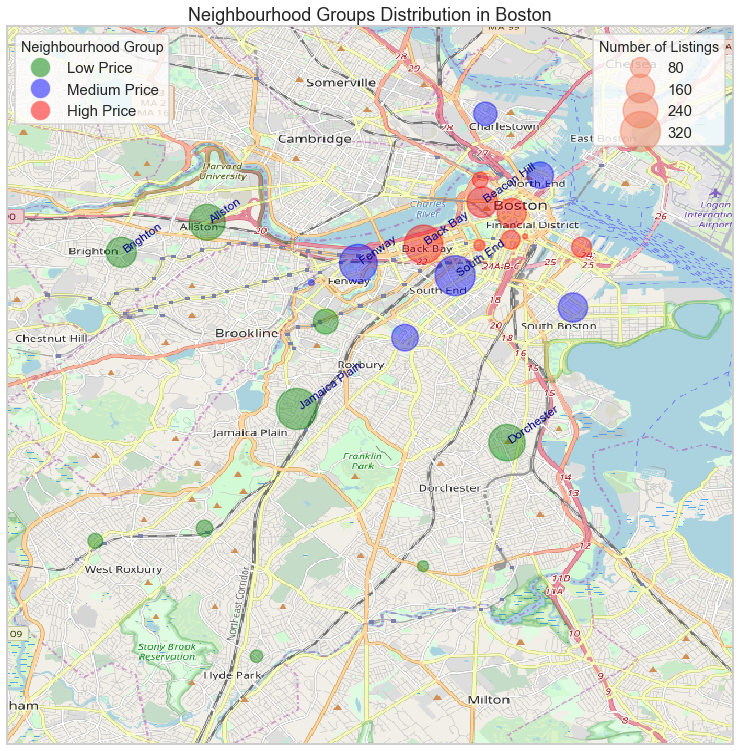

In [158]:
#Neighbourhood groups distribution in Boston
ax = scatter_map(df = df_boston_aux1, 
                 map_pic = '.\maps\\boston.png', 
                 color_col = 'neighbourhood_group', 
                 size_col = 'Number of Listings', 
                 box = box_boston, 
                 scale_size = 5, 
                 annot_limit = 180,
                 figsize = (13,17))


ax.set_title('Neighbourhood Groups Distribution in Boston')

plt.savefig('boston_neigh_count.png');

#### Conclusions:

* In Boston, the more expensive neighbourhoods are concentrated in the center of the city.


* There is also some relation between prices and the cardinal points. The cheaper neighbourhoods tend to be in the South-West of the city, and the prices tend to increase in the North-East.


* The number of listints is bigger in the center of the city also, but there are some cheaper neighbourhoods that have also a considerable number of listints like Jamaica Plain, Allston and Dorchester.

Results for the neighbourhood groups distribution in Seattle. As in the first case the color of the points is determined by the neighbourhood group. The size is determined by the count of listings in every neighbourhood.

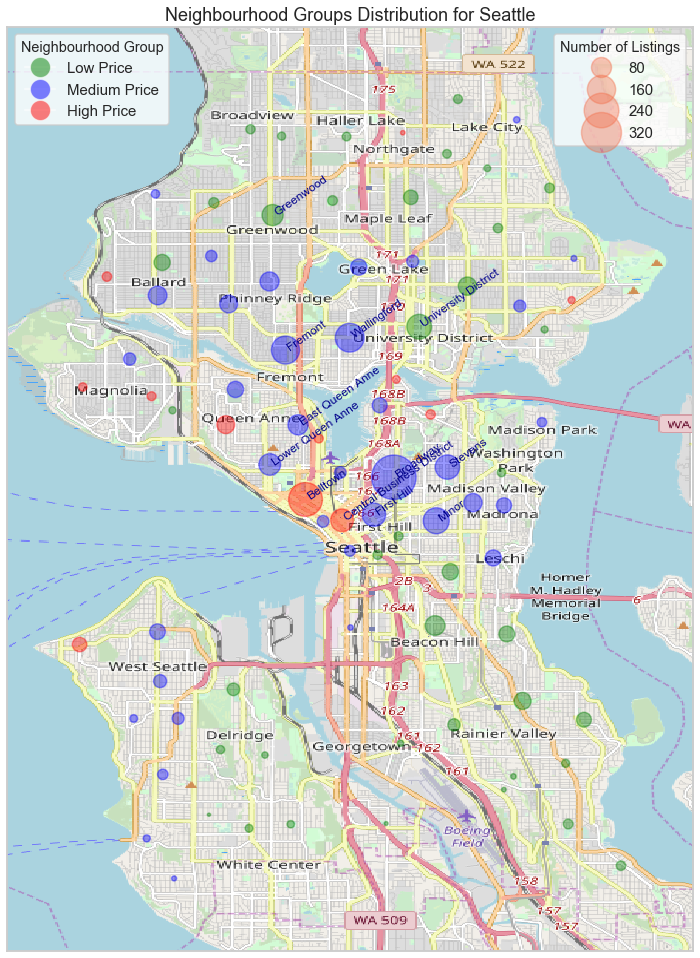

In [159]:
#Neighbourhood groups distribution in Seattle
ax = scatter_map(df = df_seattle_aux1, 
                 map_pic = '.\maps\seattle.png', 
                 color_col = 'neighbourhood_group', 
                 size_col = 'Number of Listings', 
                 box = box_seattle, 
                 scale_size= 5, 
                 annot_limit = 80,
                 figsize = (13,17))
        
ax.set_title('Neighbourhood Groups Distribution for Seattle');

plt.savefig('seattle_neigh_count.png');

#### Conlusions:

* In the case of Seattle, the more expensive neighbourhoods are not so concentrated in the center of the City. Belltown and the Central Business District are centric neighbourhoods with high prices, but there are other expensive neighbourhoods in other regions, normally surrounded by neighbourhoods with medium and low prices. Like Alki, Sunset Hill, Briarcliff, etc


* In general, the cheaper neighbourhoods tend to be in the South or in the North. 


* The neighborhood that stands out for the number of listings is Broadway, but Beltown has an important number of listings too.

Results for the host types distribution in Boston. The color of the points is determined also by the neighbourhood group, but in this case the size is determined by the percentage of hosts that have more than 5 listings in each neighbourhood.

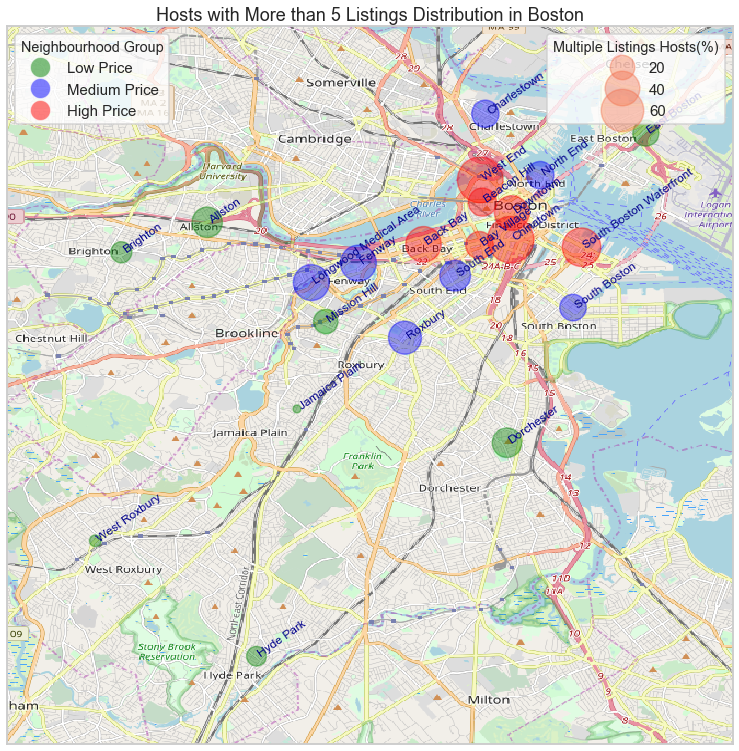

In [160]:
#Host type distribution in Boston
ax = scatter_map(df = df_boston_aux1, 
                 map_pic = '.\maps\\boston.png', 
                 color_col = 'neighbourhood_group', 
                 size_col = 'Multiple Listings Hosts(%)', 
                 box = box_boston, 
                 scale_size = 30,
                 annot_limit = 1,
                 figsize = (13,17))

ax.set_title('Hosts with More than 5 Listings Distribution in Boston');

plt.savefig('boston_multlist_count.png');

#### Conclusions:

* The hosts with several listings preffer usually the more centric and expensive neighbourhoods. In some cases as West End and Chinatown they have around the 60% of the listings.

This is the same picture as before, but in the case of Seattle.

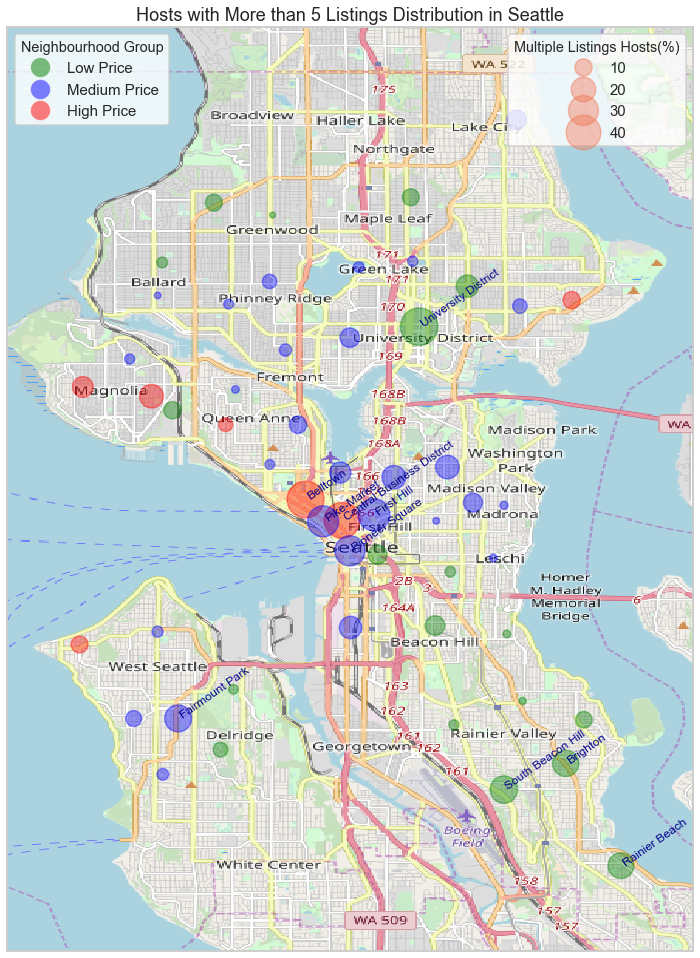

In [161]:
#Host type distribution in Seattle
ax = scatter_map(df = df_seattle_aux1, 
                 map_pic = '.\maps\seattle.png', 
                 color_col = 'neighbourhood_group', 
                 size_col = 'Multiple Listings Hosts(%)', 
                 box = box_seattle, 
                 scale_size= 30, 
                 annot_limit = 20,
                 figsize = (13,17))
            
ax.set_title('Hosts with More than 5 Listings Distribution in Seattle')

plt.savefig('seattle_multlist_count.png');

#### Conclusions:

* As in Boston, this type of hosts preffer also the centric neighbourhoods like Beltown, Pike-Market, Central Business Distric, First Hill and Pioneer Square. But there is a clear exception in this case, we can see that the University District in the North has one of the highest rates of hosts with several listings. This is a neighbourhood with low prices, but the presence of an universitary community can have encourage investors to buy houses there with the intention of rent them.

<a id='Predictions'></a>
## 6. Prediction Models

<a id='More_Modeling'></a>
### More Modeling to Make the Predictions

Now we create a copy of the dataframes and apply the this function over some categorical variables.

In [162]:
df_boston_pred = df_boston_listings_limited.copy()
df_seattle_pred = df_seattle_listings_limited.copy()

We create here these dummy columns because we needed the column neighbourhood_cleansed in the geographical analysis.

In [163]:
#create the dummy columns for neighbourhood_cleansed in Boston
df_boston_pred, boston_neighbourhood_cols, boston_neighbourhood_int = get_dummy_columns(df_boston_pred, 
                                                                                        'neighbourhood_cleansed')

#create the dummy columns for neighbourhood_cleansed in Seattle
df_seattle_pred, seattle_neighbourhood_cols, seattle_neighbourhood_int = get_dummy_columns(df_seattle_pred, 
                                                                                          'neighbourhood_cleansed')

We drop out the intercepts in the dummy columns:

In [164]:
df_boston_pred = df_boston_pred.drop(columns = [boston_neighbourhood_int, 
                                                   boston_host_response_int,
                                                   boston_property_type_int,
                                                   boston_room_type_int,
                                                   boston_bed_type_int,
                                                   boston_canc_policy_int])

df_seattle_pred = df_seattle_pred.drop(columns = [seattle_neighbourhood_int, 
                                                   seattle_host_response_int,
                                                   seattle_property_type_int,
                                                   seattle_room_type_int,
                                                   seattle_bed_type_int,
                                                   seattle_canc_policy_int])

We change the variable `security_deposit` by a boolean variable: True if the listing has a security deposit and false if not.
I don't want to have variables about costs to predict the prize, but to have a deposit or not is something that we could know before knowing the price.

In [165]:
df_boston_pred.security_deposit = df_boston_pred.security_deposit > 0
df_seattle_pred.security_deposit = df_seattle_pred.security_deposit > 0

We have seen before that the latitude and the longitude had some correlation with the price, we are going to include them, but we are going to chage them by the increments in latitude and longitude respect the minimum values in the dataframe. I'm also going to multiply them by 100. I think that they are more handly values.  

In [166]:
df_boston_pred.longitude = (df_boston_pred.longitude - min(df_boston_pred.longitude)) * 100
df_boston_pred.latitude = (df_boston_pred.latitude - min(df_boston_pred.latitude)) * 100

In [167]:
df_seattle_pred.longitude = (df_seattle_pred.longitude - min(df_seattle_pred.longitude)) * 100
df_seattle_pred.latitude = (df_seattle_pred.latitude - min(df_seattle_pred.latitude)) * 100

We drop out the column neighbourhood_group because is redundant with neighbourhood_cleansed and it was calculated using the price.

In [168]:
df_boston_pred = df_boston_pred.drop(columns = ['neighbourhood_group'])
df_seattle_pred =  df_seattle_pred.drop(columns = ['neighbourhood_group'])

By the moment we are going  to drop out the rest of the categorical columns that we have not used:

In [169]:
#dataframes to make predictions without information about 'street', 'zipcode', 'city', 'smart_location'.
df_boston_pred_1 = df_boston_pred.drop(columns = ['street', 'zipcode', 'city', 'smart_location'])
df_seattle_pred_1 = df_seattle_pred.drop(columns = ['street', 'zipcode', 'city', 'smart_location'])

<a id='Simple_Linear'></a>
### Simple Linear Regression Model

First we will try with a simple Linear Regression model. We use the function `apply_lm_mod` included in `auxiliary_functions`. 
We use in this prediction all the features avilable in the dataframe:

In [170]:
#prepare the matrix with features and the output variable
X = df_boston_pred_1.drop(columns = ['total_price'])
y = df_boston_pred_1['total_price']

#apply linear regression model
coefs_df, intercept, r2_scores_test, r2_scores_train  = apply_lm_mod(X, 
                                                                     y, 
                                                                     test_size = .30, 
                                                                     random_state=42, 
                                                                     normalize = True)

#Print the results for the R2 scores
print('R2 in Test Set: ', r2_scores_test)
print('R2 in Train Set: ', r2_scores_train)
print('Intercept: ', intercept)
#A quick look at the top results
coefs_aux = pd.concat([coefs_df.head(20), coefs_df.tail(20)])
coefs_aux

R2 in Test Set:  0.7353247071356956
R2 in Train Set:  0.7263992958692791
Intercept:  -4.397095199715409


est_int       coefs   abs_coefs
111              neighbourhood_cleansed_Bay Village  126.784775  126.784775
89                               property_type_Boat   65.452260   65.452260
110                 neighbourhood_cleansed_Back Bay   62.474932   62.474932
130  neighbourhood_cleansed_South Boston Waterfront   58.926340   58.926340
117                 neighbourhood_cleansed_Downtown   55.465847   55.465847
112              neighbourhood_cleansed_Beacon Hill   54.006419   54.006419
108             cancellation_policy_super_strict_30   49.206573   49.206573
12                                     cleaning_fee   45.175727   45.175727
28                 require_guest_phone_verification   44.710917   44.710917
119                   neighbourhood_cleansed_Fenway   41.841845   41.841845
131                neighbourhood_cleansed_South End   40.344151   40.344151
97                              property_type_Other   40.338400   40.338400
9                                          bedrooms   36.947446   36.947446
115                neighbourhood_cleansed_Chinatown   27.904255   27.904255
126                neighbourhood_cleansed_North End   26.160946   26.160946
98                          property_type_Townhouse   23.063106   23.063106
1                                 host_is_superhost   20.058690   20.058690
33                               verification_phone   19.078337   19.078337
86            host_response_time_within a few hours   19.070958   19.070958
43                       amenities_Indoor_Fireplace   17.796559   17.796559
41                               verification_email  -17.739502   17.739502
71                                amenities_Kitchen  -18.639351   18.639351
46                             amenities_Essentials  -19.808523   19.808523
92                               property_type_Dorm  -21.052427   21.052427
127               neighbourhood_cleansed_Roslindale  -21.846487   21.846487
103                                  bed_type_Futon  -21.958633   21.958633
47                             amenities_Other_pets  -27.202168   27.202168
64              amenities_Paid_Parking_Off_Premises  -28.205957   28.205957
123    neighbourhood_cleansed_Longwood Medical Area  -31.761262   31.761262
40                               verification_weibo  -33.209285   33.209285
116               neighbourhood_cleansed_Dorchester  -34.562223   34.562223
81                 amenities_Free_Parking_on_Street  -35.110147   35.110147
104                          bed_type_Pull-out Sofa  -35.874655   35.874655
118              neighbourhood_cleansed_East Boston  -43.385837   43.385837
27                    require_guest_profile_picture  -45.351076   45.351076
102                                  bed_type_Couch  -47.295432   47.295432
93                       property_type_Entire Floor  -63.868659   63.868659
39                             verification_sent_id  -69.372858   69.372858
100                          room_type_Private room  -72.728527   72.728527
101                           room_type_Shared room  -73.042610   73.042610

In [171]:
#prepare the matrix with features and the output variable
X = df_seattle_pred_1.drop(columns = ['total_price'])
y = df_seattle_pred_1['total_price']

#apply linear regression model
coefs_df, intercept, r2_scores_test, r2_scores_train  = apply_lm_mod(X, 
                                                                     y, 
                                                                     test_size = .30, 
                                                                     random_state=42,
                                                                     normalize = True)

#Print the results for the R2 scores
print('R2 in Test Set: ', r2_scores_test)
print('R2 in Train Set: ', r2_scores_train)
print('Intercept: ', intercept)
#A quick look at the top results
coefs_aux = pd.concat([coefs_df.head(20), coefs_df.tail(20)])
coefs_aux

R2 in Test Set:  0.7192412586115904
R2 in Train Set:  0.7473831083432827
Intercept:  -110.70342292421662


est_int       coefs   abs_coefs
142  neighbourhood_cleansed_Industrial District  112.908625  112.908625
168          neighbourhood_cleansed_Pike-Market  108.710234  108.710234
170       neighbourhood_cleansed_Pioneer Square  104.428605  104.428605
88                           property_type_Boat  101.902424  101.902424
129           neighbourhood_cleansed_Fauntleroy   84.671698   84.671698
160        neighbourhood_cleansed_North Admiral   70.047433   70.047433
132             neighbourhood_cleansed_Gatewood   67.866027   67.866027
185          neighbourhood_cleansed_Sunset Hill   64.101012   64.101012
112        neighbourhood_cleansed_Arbor Heights   59.927428   59.927428
128       neighbourhood_cleansed_Fairmount Park   59.195549   59.195549
140        neighbourhood_cleansed_Highland Park   58.359382   58.359382
111                 neighbourhood_cleansed_Alki   56.534858   56.534858
180       neighbourhood_cleansed_South Delridge   53.792573   53.792573
177              neighbourhood_cleansed_Seaview   53.067185   53.067185
148     neighbourhood_cleansed_Lower Queen Anne   48.948334   48.948334
133              neighbourhood_cleansed_Genesee   48.788894   48.788894
191      neighbourhood_cleansed_West Queen Anne   48.152335   48.152335
114             neighbourhood_cleansed_Belltown   46.800054   46.800054
130           neighbourhood_cleansed_First Hill   46.578517   46.578517
176              neighbourhood_cleansed_Roxhill   46.152589   46.152589
175            neighbourhood_cleansed_Roosevelt  -36.661560   36.661560
120               neighbourhood_cleansed_Bryant  -37.063018   37.063018
187      neighbourhood_cleansed_Victory Heights  -38.475064   38.475064
136            neighbourhood_cleansed_Greenwood  -38.665579   38.665579
115          neighbourhood_cleansed_Bitter Lake  -43.592247   43.592247
173              neighbourhood_cleansed_Ravenna  -48.787155   48.787155
154       neighbourhood_cleansed_Matthews Beach  -51.578374   51.578374
102                      room_type_Private room  -51.861896   51.861896
169            neighbourhood_cleansed_Pinehurst  -54.102098   54.102098
121           neighbourhood_cleansed_Cedar Park  -58.097382   58.097382
155          neighbourhood_cleansed_Meadowbrook  -59.131934   59.131934
153           neighbourhood_cleansed_Maple Leaf  -60.524618   60.524618
163   neighbourhood_cleansed_North College Park  -69.686513   69.686513
118            neighbourhood_cleansed_Broadview  -70.134710   70.134710
166        neighbourhood_cleansed_Olympic Hills  -72.113033   72.113033
188           neighbourhood_cleansed_View Ridge  -73.388398   73.388398
124           neighbourhood_cleansed_Crown Hill  -86.302251   86.302251
103                       room_type_Shared room  -88.424849   88.424849
137          neighbourhood_cleansed_Haller Lake -114.509429  114.509429
94                           property_type_Dorm -231.949416  231.949416

#### Conclusions:

* The results for the R-squared are 0.73 in Boston and 0.72 in Seattle. 


* The neighbourgoods play an important role in the prediction using a linear model.




<a id='Optimal_Linear'></a>
### Find Optimal Linear Regression Model

The results are maybe normal for a linear regresion model, but we let see if we can improve them.

We have included a function called `find_optimal_lm_model` in `auxiliary_functions.py`. In this function we can apply the linear regression model for groups of columns or features. This columns are determined by a list of cutoffs. The cutoffs determine the maximum numnber of zeros that a column should have to be included in the parameters matrix. For example, if an amenity is only present in 23 listings, it will not be used for a cutoff of 50, but it will bi used in the cutoff of 20.

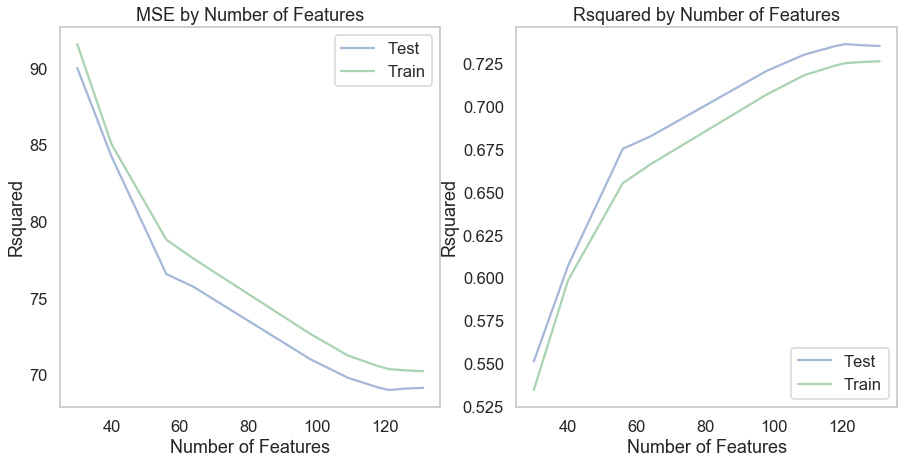

R2 in Test Set:  0.7364333823093758
R2 in Train Set:  0.7253193658680448
Intercept:  -110.70342292421662
Number of Features:  121


est_int       coefs   abs_coefs
100              neighbourhood_cleansed_Bay Village  131.172113  131.172113
84                               property_type_Boat   66.393154   66.393154
99                  neighbourhood_cleansed_Back Bay   66.252874   66.252874
117  neighbourhood_cleansed_South Boston Waterfront   64.562885   64.562885
106                 neighbourhood_cleansed_Downtown   59.637695   59.637695
101              neighbourhood_cleansed_Beacon Hill   57.947868   57.947868
97              cancellation_policy_super_strict_30   49.187193   49.187193
12                                     cleaning_fee   44.977460   44.977460
28                 require_guest_phone_verification   44.685773   44.685773
108                   neighbourhood_cleansed_Fenway   44.615043   44.615043
118                neighbourhood_cleansed_South End   44.271676   44.271676
88                              property_type_Other   39.786112   39.786112
9                                          bedrooms   37.087759   37.087759
104                neighbourhood_cleansed_Chinatown   32.248532   32.248532
113                neighbourhood_cleansed_North End   29.867488   29.867488
89                          property_type_Townhouse   23.520638   23.520638
1                                 host_is_superhost   19.798826   19.798826
81            host_response_time_within a few hours   18.955602   18.955602
41                       amenities_Indoor_Fireplace   17.541570   17.541570
33                               verification_phone   17.426392   17.426392
40                                 verification_kba   -8.761108    8.761108
73                                amenities_Hangers   -8.841034    8.841034
35                            verification_facebook   -9.080656    9.080656
57                                   amenities_Cats   -9.735228    9.735228
36                               verification_jumio   -9.965153    9.965153
92                                   bed_type_Futon  -11.621396   11.621396
30                             verification_reviews  -14.031813   14.031813
56                        amenities_Smoking_Allowed  -14.074453   14.074453
38                                verification_amex  -15.462946   15.462946
39                               verification_email  -18.290578   18.290578
67                                amenities_Kitchen  -18.416337   18.416337
114               neighbourhood_cleansed_Roslindale  -19.366165   19.366165
44                             amenities_Essentials  -19.549988   19.549988
93                           bed_type_Pull-out Sofa  -23.496962   23.496962
45                             amenities_Other_pets  -26.662185   26.662185
105               neighbourhood_cleansed_Dorchester  -28.892440   28.892440
107              neighbourhood_cleansed_East Boston  -38.042016   38.042016
27                    require_guest_profile_picture  -45.228432   45.228432
90                           room_type_Private room  -73.439892   73.439892
91                            room_type_Shared room  -76.814343   76.814343

In [172]:
#prepare the matrix with features and the output variable
X = df_boston_pred_1.drop(columns = ['total_price'])
y = df_boston_pred_1['total_price']

#define the cutoffs
cutoffs = [3000, 2000, 1000, 500, 100, 50, 20, 10, 5, 1]

#apply the linear regression model
coefs_boston_df, r2_scores_test_max, r2_scores_train_max, X_train, X_test, y_train, y_test, lm_model = find_optimal_lm_mod(X,
                                                                                                                    y,
                                                                                                                    cutoffs)
#print out the results
print('R2 in Test Set: ', r2_scores_test_max)
print('R2 in Train Set: ', r2_scores_train_max)
print('Intercept: ', intercept)
print('Number of Features: ', X_train.shape[1])
#A quick look at the top results
coefs_aux = pd.concat([coefs_boston_df.head(20), coefs_boston_df.tail(20)])
coefs_aux

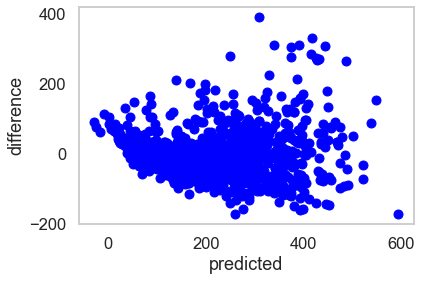

In [173]:
y_test_preds = lm_model.predict(X_test)

preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']

plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

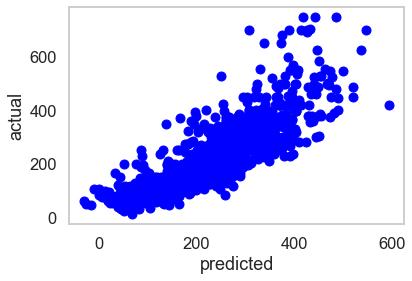

In [174]:
plt.plot(preds_vs_act['preds'], preds_vs_act['actual'], 'bo');
plt.xlabel('predicted');
plt.ylabel('actual');

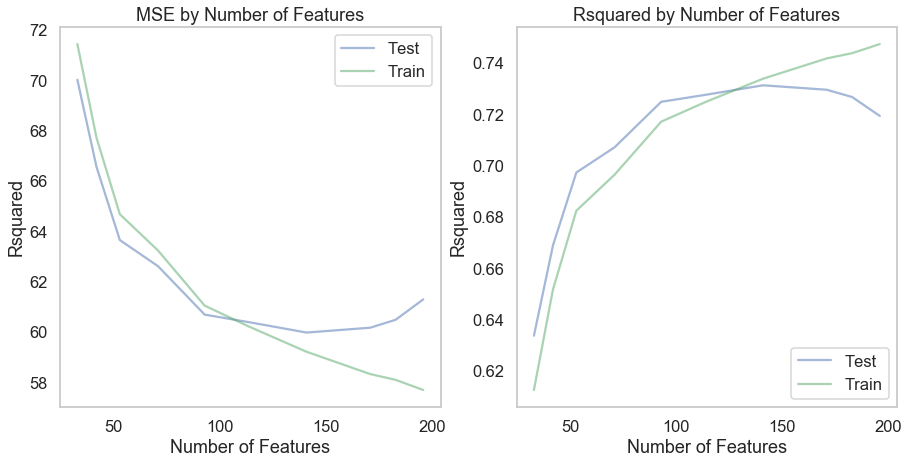

R2 in Test Set:  0.7313032332602594
R2 in Train Set:  0.7338768800994708
Intercept:  -110.70342292421662
Number of Features:  141


est_int      coefs  abs_coefs
130             neighbourhood_cleansed_Pioneer Square  81.084590  81.084590
129                neighbourhood_cleansed_Pike-Market  54.845008  54.845008
62                                  amenities_Doorman  44.372682  44.372682
9                                            bedrooms  39.925475  39.925475
138            neighbourhood_cleansed_West Queen Anne  38.477535  38.477535
12                                       cleaning_fee  35.931612  35.931612
116           neighbourhood_cleansed_Lower Queen Anne  33.281217  33.281217
108                 neighbourhood_cleansed_First Hill  29.764299  29.764299
135                    neighbourhood_cleansed_Stevens  29.382535  29.382535
100                   neighbourhood_cleansed_Broadway  27.241504  27.241504
99                    neighbourhood_cleansed_Belltown  26.984448  26.984448
134           neighbourhood_cleansed_South Lake Union  26.964528  26.964528
124              neighbourhood_cleansed_North Admiral  26.275910  26.275910
118                    neighbourhood_cleansed_Madrona  26.192945  26.192945
8                                           bathrooms  24.065074  24.065074
82                      property_type_Bed & Breakfast  22.661113  22.661113
86                                 property_type_Loft  21.839126  21.839126
102  neighbourhood_cleansed_Central Business District  20.094065  20.094065
105            neighbourhood_cleansed_East Queen Anne  19.316143  19.316143
112                 neighbourhood_cleansed_Green Lake  17.057923  17.057923
92                             bed_type_Pull-out Sofa  -9.158866   9.158866
132                  neighbourhood_cleansed_Roosevelt -10.040768  10.040768
76                                  amenities_Heating -10.352110  10.352110
80              host_response_time_within a few hours -10.547821  10.547821
139              neighbourhood_cleansed_West Woodland -11.149813  11.149813
101                     neighbourhood_cleansed_Bryant -11.446643  11.446643
25                                review_scores_value -11.548177  11.548177
72                                  amenities_Hangers -12.833417  12.833417
37                                  verification_amex -13.802198  13.802198
114                neighbourhood_cleansed_Lawton Park -14.086986  14.086986
128              neighbourhood_cleansed_Phinney Ridge -14.731602  14.731602
63                                   amenities_Washer -15.196532  15.196532
113                  neighbourhood_cleansed_Greenwood -15.733111  15.733111
60                         amenities_24-Hour_Check-in -17.154601  17.154601
131                    neighbourhood_cleansed_Ravenna -23.144365  23.144365
120                 neighbourhood_cleansed_Maple Leaf -28.774557  28.774557
126             neighbourhood_cleansed_North Delridge -32.405126  32.405126
89                             room_type_Private room -53.627775  53.627775
104                 neighbourhood_cleansed_Crown Hill -64.211952  64.211952
90                              room_type_Shared room -94.641520  94.641520

In [175]:
#prepare the matrix with features and the output variable
X = df_seattle_pred_1.drop(columns = ['total_price'])
y = df_seattle_pred_1['total_price']

#deifine the cutoffs
cutoffs = [3000, 2000, 1000, 500, 100, 50, 20, 10, 5, 1]

#apply the linear regression model
coefs_seattle_df, r2_scores_test_max, r2_scores_train_max, X_train, X_test, y_train, y_test, lm_model = find_optimal_lm_mod(X, 
                                                                                                                    y,                                                                                                             
                                                                                                                    cutoffs)
#print out the results
print('R2 in Test Set: ', r2_scores_test_max)
print('R2 in Train Set: ', r2_scores_train_max)
print('Intercept: ', intercept)
print('Number of Features: ', X_train.shape[1])
#A quick look at the top results
coefs_aux = pd.concat([coefs_seattle_df.head(20), coefs_seattle_df.tail(20)])
coefs_aux

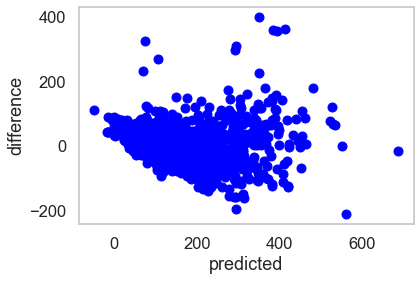

In [176]:
y_test_preds = lm_model.predict(X_test)

preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']

plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

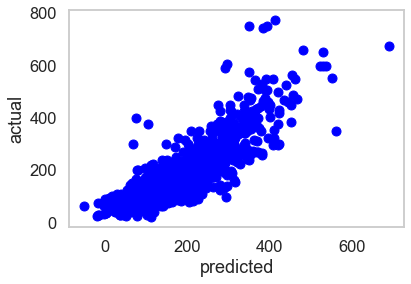

In [177]:
plt.plot(preds_vs_act['preds'], preds_vs_act['actual'], 'bo');
plt.xlabel('predicted');
plt.ylabel('actual');

#### Conclusions:

* We have obtained an R-squared around 0.74 in Boston and 0.73 in Seattle. They are very similar to the results obtained before. 


* We can see also that the model have some tendency to overstimate the price, although there are some listings in the upper side that are understimated. 

<a id='Main_Coeficients_Linear'></a>
### Main Coeficients in the Linear Regression Model

In this case we want to draw the differences betweent thos coeficients that increase and decrease more the price, both in Boston and in Seattle.

We don't take into account the features related with the neighbourhood because we want to compare the two cities and the neighbourhood is a value very specific for each city.

We don't take into account also the amenities because we are going to analyce them later.

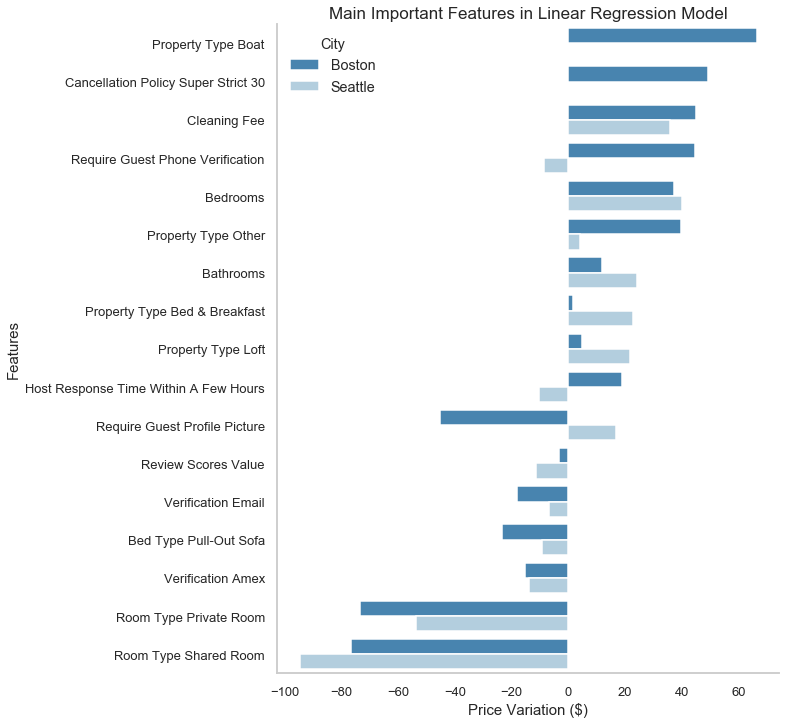

In [178]:
#get the coeficients except thos related with the neighbourhood
coefs_boston_df_aux = coefs_boston_df[~coefs_boston_df.est_int.isin(boston_neighbourhood_cols + boston_amenities_columns)]
coefs_seattle_df_aux = coefs_seattle_df[~coefs_seattle_df.est_int.isin(seattle_neighbourhood_cols + seattle_amenities_columns)]

#get for each city the seve coeficients that more increse and more decrease the price
coefs_boston_aux = list(pd.concat([coefs_boston_df_aux.head(5), coefs_boston_df_aux.tail(5)])['est_int'])
coefs_seattle_aux = list(pd.concat([coefs_seattle_df_aux.head(5), coefs_seattle_df_aux.tail(5)])['est_int'])

#sum the two lists of coefiecientes
total_coefs = coefs_boston_aux + coefs_seattle_aux

#get the values fot this coefiecients
coefs_seattle_df_aux = coefs_seattle_df[coefs_seattle_df.est_int.isin(total_coefs)]
coefs_boston_df_aux = coefs_boston_df[coefs_boston_df.est_int.isin(total_coefs)]

#make a single dataframe with the coeficients for the two cities
coefs_boston_df_aux['city'] = 'Boston'
coefs_seattle_df_aux['city'] = 'Seattle'
comp_coef_df = coefs_boston_df_aux.append(coefs_seattle_df_aux, ignore_index=True, sort=False)
comp_coef_df = comp_coef_df.sort_values(by=['coefs'], ascending=False)

#We change the names of the features
comp_coef_df['est_int'] = comp_coef_df['est_int'].str.replace('amenities_', 'Amenities: ').str.replace('_', ' ')
comp_coef_df['est_int'] = comp_coef_df['est_int'].str.replace('room_type_', 'Room Type: ')
comp_coef_df['est_int'] = comp_coef_df['est_int'].str.replace('property_type_', 'Property Type: ')
comp_coef_df['est_int'] = comp_coef_df['est_int'].str.replace('cancellation_policy_', 'Cancellation Policy: ')

#Change the name of the features to title format
comp_coef_df['est_int'] = comp_coef_df['est_int'].str.replace('_', ' ').str.title()

#depict a catplot with the neighbourhood group as the hue variable 
ax = sns.catplot(x='coefs', 
                y='est_int', 
                hue='city', 
                data=comp_coef_df, kind='bar', 
                height=10, 
                aspect=1.2, 
                palette="Blues_r",
                legend=False);

#adapt the labels, title, legend, etc.
plt.xlabel('Price Variation ($)', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Main Important Features in Linear Regression Model', fontsize=17)
plt.legend(title= "City", title_fontsize = 'x-large', loc= 'upper left', fontsize = 'x-large', frameon = False)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

#### Conclusions:

We can see a lot of things here, but we can select the next few:

* `Property Type: Boat` is the most important feature to increase the price in Boston, but it is not relevant in Seattle.

* Having a `Doorman` means an increment in the price of more than 25 dollars in Seattle, but it almost has no effect in Boston, at least in this model.

* Room Types Private Room and Shared Room are strongly asociated with decrements on the price both in Seattle and Boston.

<a id='Main_Amenities_Linear'></a>
### Main Amenities in the Linear Regression Model

We will do the same as before, but focusing our attention in the amenities.

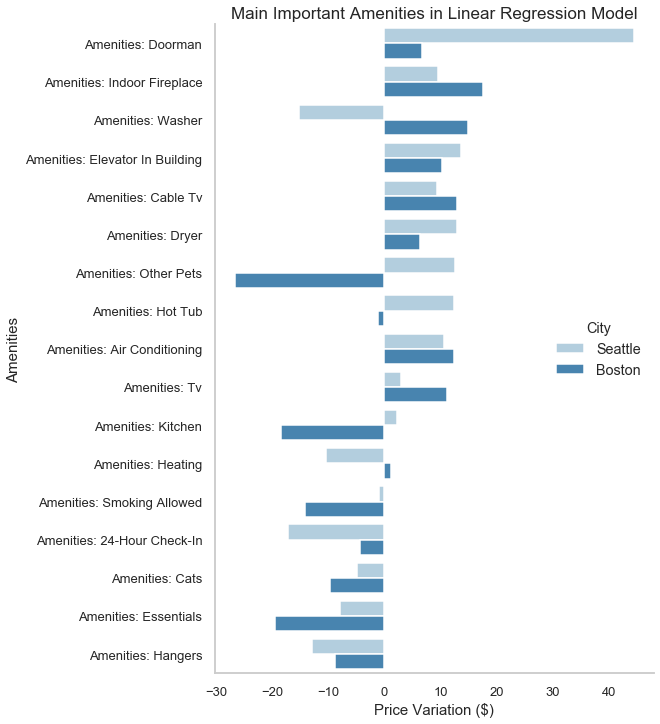

In [179]:
#get the coeficients related with amenities
coefs_boston_df_aux = coefs_boston_df[coefs_boston_df.est_int.isin(boston_amenities_columns)]
coefs_seattle_df_aux = coefs_seattle_df[coefs_seattle_df.est_int.isin(seattle_amenities_columns)]

#get for each city the seven amenities that more increse and more decrease the price
coefs_boston_aux = list(pd.concat([coefs_boston_df_aux.head(5), coefs_boston_df_aux.tail(5)])['est_int'])
coefs_seattle_aux = list(pd.concat([coefs_seattle_df_aux.head(5), coefs_seattle_df_aux.tail(5)])['est_int'])

#sum the two lists of coefiecientes
total_coefs = coefs_boston_aux + coefs_seattle_aux

#get the values fot this coefiecients
coefs_seattle_df_aux = coefs_seattle_df[coefs_seattle_df.est_int.isin(total_coefs)]
coefs_boston_df_aux = coefs_boston_df[coefs_boston_df.est_int.isin(total_coefs)]

#make a single dataframe with the coeficients for the two cities
coefs_boston_df_aux['city'] = 'Boston'
coefs_seattle_df_aux['city'] = 'Seattle'
comp_coef_df = coefs_seattle_df_aux.append(coefs_boston_df_aux, ignore_index=True, sort=True)
comp_coef_df = comp_coef_df.sort_values(by=['coefs', 'city'], ascending=False)

#We change the names of the features
comp_coef_df['est_int'] = comp_coef_df['est_int'].str.replace('amenities_', 'Amenities: ').str.replace('_', ' ')

#Change the name of the features to title format
comp_coef_df['est_int'] = comp_coef_df['est_int'].str.replace('_', ' ').str.title()

#depict a catplot with the neighbourhood group as the hue variable 
ax = sns.catplot(x='coefs', 
                y='est_int', 
                hue='city', 
                data=comp_coef_df, kind='bar', 
                height=10, 
                aspect=1, 
                palette="Blues",
                legend=False);

#adapt the labels, title, legend, etc.
plt.xlabel('Price Variation ($)', fontsize=15)
plt.ylabel('Amenities', fontsize=15)
plt.title('Main Important Amenities in Linear Regression Model', fontsize=17)
plt.legend(title= "City", title_fontsize = 'x-large', loc= 'center right', fontsize = 'x-large', frameon = False)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);


#### Conclusions:

Some conclusions that we can extract from this graphic are:

* `Doorman` is associated with an increment in the price in Seattle, but the effect is not so relevant in Boston.

* `Other Pets` is associated with an increment of the price in Seattle and a decrement in Boston. On the other hand, `having a washer`is associated with decrement in Seattle and an increment in Boston.

* `Hangers`, `Essentials` and `Cats` are normaly associated with a decrement of the price both in Seattle and in Boston.

* `Smoking Allowed` and `Kitchen` means a decrement of the price more important in Boston than in Seattle.

* `Kitchen` means a decrement in Boston, but is almost neutral in Seattle. 

* `24-Hour Check-In` means a bigger decrement of the price in Seattle than in Boston.

<a id='Random_Forests'></a>
### Making Predictions With Random Forests

Let's see if we can improve the prediction results applying Random Forests. We have included a function `find_optimal_rf_mod` in `auxiliary_funtions.py` that apply random forests for list of features. These features are also determined by a list of cutoffs with the same method as in the case of Linnear Regression.

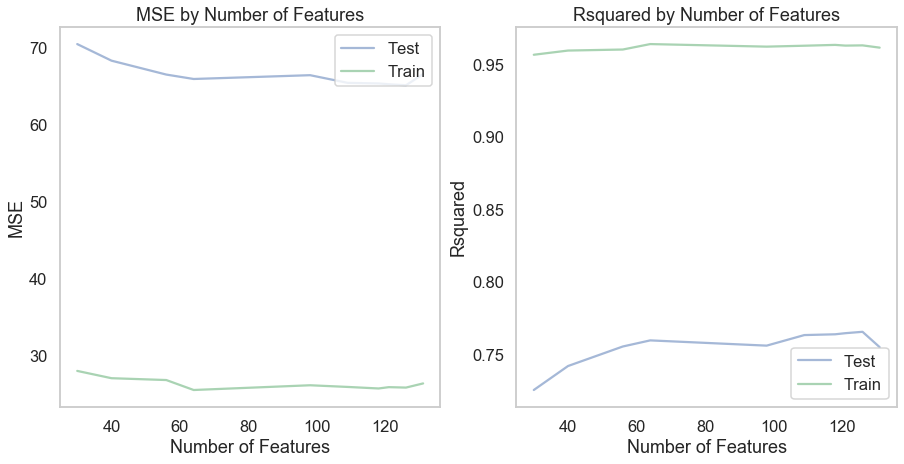

R2 in Test Set:  0.763545907770727
R2 in Train Set:  0.9633170682101446
Number of Features:  126


In [180]:
X = df_boston_pred_1.drop(columns = ['total_price'])
y = df_boston_pred_1['total_price']

cutoffs = [3000, 2000, 1000, 500, 100, 50, 20, 10, 5, 1]
r2_test, r2_train, rf_model, X_train, X_test, y_train, y_test = find_optimal_rf_mod(X, y, cutoffs)

print('R2 in Test Set: ', r2_test)
print('R2 in Train Set: ', r2_train)
print('Number of Features: ', X_train.shape[1])

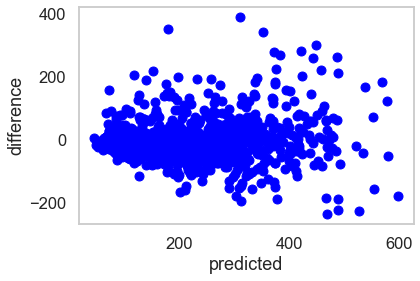

In [181]:
y_test_preds = rf_model.predict(X_test)

preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']

plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

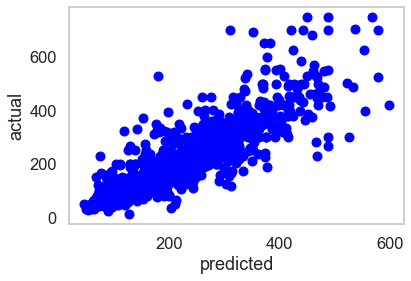

In [182]:
plt.plot(preds_vs_act['preds'], preds_vs_act['actual'], 'bo');
plt.xlabel('predicted');
plt.ylabel('actual');

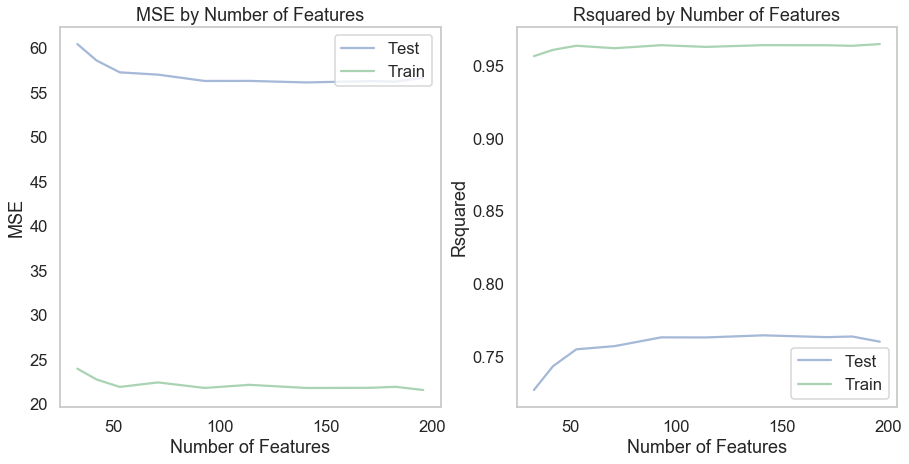

R2 in Test Set:  0.7632870848941826
R2 in Train Set:  0.9637142801869103
Number of Features:  141


In [183]:
X = df_seattle_pred_1.drop(columns = ['total_price'])
y = df_seattle_pred_1['total_price']

cutoffs = [3000, 2000, 1000, 500, 100, 50, 20, 10, 5, 1]
r2_test, r2_train, rf_model, X_train, X_test, y_train, y_test = find_optimal_rf_mod(X, y, cutoffs)

print('R2 in Test Set: ', r2_test)
print('R2 in Train Set: ', r2_train)

print('Number of Features: ', X_train.shape[1])

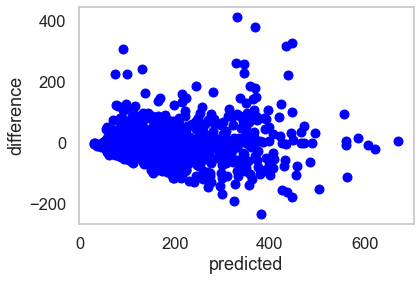

In [184]:
y_test_preds = rf_model.predict(X_test)

preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']

plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

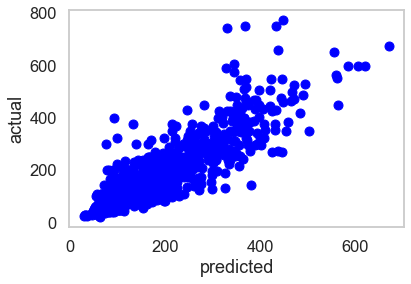

In [185]:
plt.plot(preds_vs_act['preds'], preds_vs_act['actual'], 'bo');
plt.xlabel('predicted');
plt.ylabel('actual');

#### Conclusions:

* The results are a little better, we have a R-squeared of 0.76 in Boston and Seattle. 


* We can see  again that we have some bad predictions in prices over 600 dollars that are understimated, but in general this model doesn't overstimate as much as the linear regression model. 

We could drop the prices bigger tha 600 to have a little better prediction of most part of the market (in fact we did it, but the results were not significantly better).

Now we are going to add dummy columns for the categorical variable 'street' to see if we can improve a little bit more the prediction.

In [186]:
df_boston_pred_2 = df_boston_pred.copy()
df_seattle_pred_2 = df_seattle_pred.copy()

df_boston_pred_2 = df_boston_pred_2.drop(columns = ['city', 'smart_location', 'zipcode'])
df_seattle_pred_2 = df_seattle_pred_2.drop(columns = ['city', 'smart_location', 'zipcode'])

In [187]:
#create the dummy columns for street in Boston
df_boston_pred_2, boston_street_cols, boston_street_int = get_dummy_columns(df_boston_pred_2, 'street')

#create the dummy columns for street in Seattle
df_seattle_pred_2, seattle_street_cols, seattle_street_int = get_dummy_columns(df_seattle_pred_2, 'street')

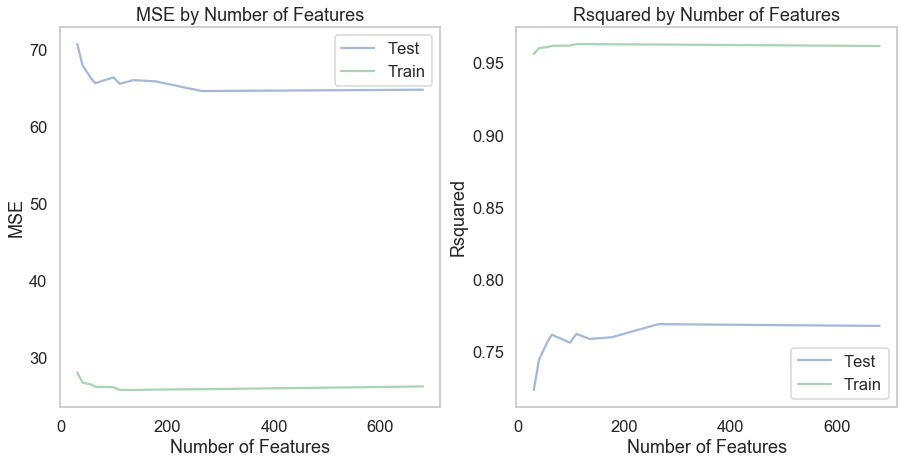

R2 in Test Set:  0.769944402897646
R2 in Train Set:  0.9636927678424113
Number of Features:  264


In [188]:
X = df_boston_pred_2.drop(columns = ['total_price'])
y = df_boston_pred_2['total_price']

cutoffs = [3000, 2000, 1000, 500, 100, 50, 20, 10, 5, 1]
r2_test, r2_train, rf_model, X_train, X_test, y_train, y_test = find_optimal_rf_mod(X, y, cutoffs)

print('R2 in Test Set: ', r2_test)
print('R2 in Train Set: ', r2_train)
print('Number of Features: ', X_train.shape[1])

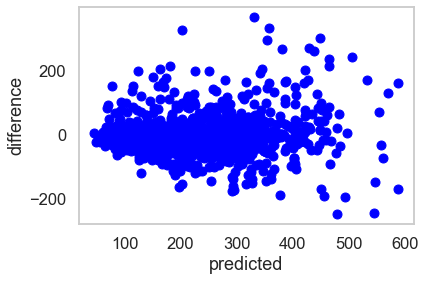

In [189]:
y_test_preds = rf_model.predict(X_test)

preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']

plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

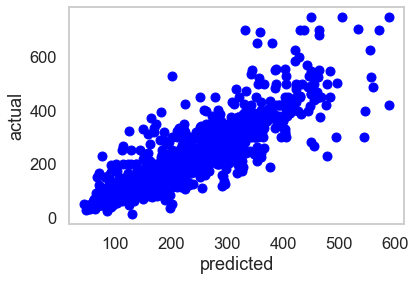

In [190]:
plt.plot(preds_vs_act['preds'], preds_vs_act['actual'], 'bo');
plt.xlabel('predicted');
plt.ylabel('actual');

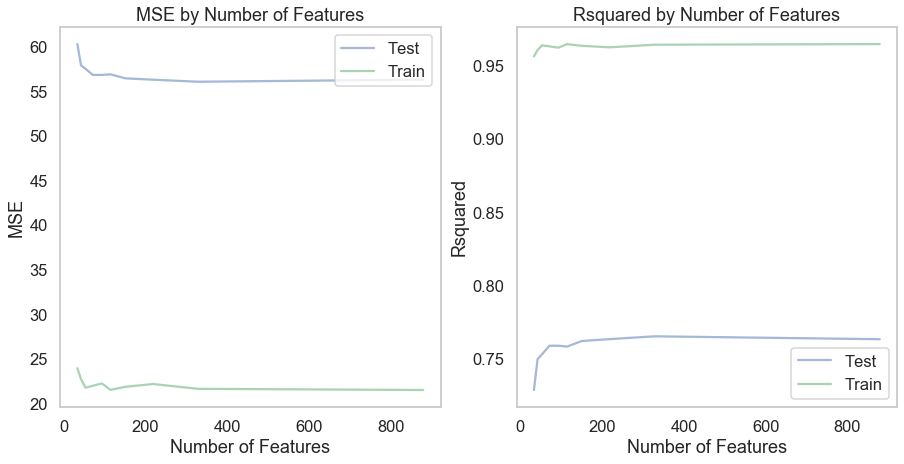

R2 in Test Set:  0.7677998258425558
R2 in Train Set:  0.9629862399764791
Number of Features:  328


In [191]:
X = df_seattle_pred_2.drop(columns = ['total_price'])
y = df_seattle_pred_2['total_price']

cutoffs = [3000, 2000, 1000, 500, 100, 50, 20, 10, 5, 1]
r2_test, r2_train, rf_model, X_train, X_test, y_train, y_test = find_optimal_rf_mod(X, y, cutoffs)

print('R2 in Test Set: ', r2_test)
print('R2 in Train Set: ', r2_train)

print('Number of Features: ', X_train.shape[1])

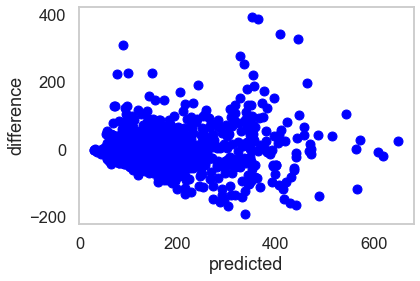

In [192]:
y_test_preds = rf_model.predict(X_test)

preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']

plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

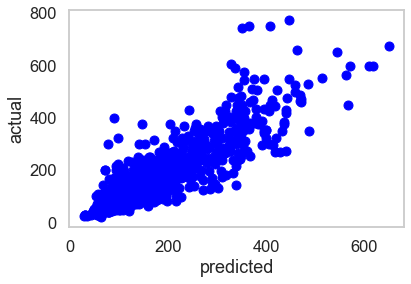

In [193]:
plt.plot(preds_vs_act['preds'], preds_vs_act['actual'], 'bo');
plt.xlabel('predicted');
plt.ylabel('actual');

#### Conclusions:

* In this case, we have increased a lot he number of features, but the final result for the r-squared is very similar to the one obtained without the information of the street. Surely because this information is redundant with the variables `neighbourhood`, `latitude` and `longitud`.

<a id='Random_Forests_GS'></a>
### Random Forest And GridSearchCV

Anyway it seems that random forests has better performance than linear regression.

We are going to use the data sets without the street information: `df_boston_pred_1` and `df_seattle_pred_1` and we are going to apply to them random forests with grid search cross validation to determine the optimal values to be used for the hyperparameters of the ramdom forest model.

As before, we select a list of cutoffs to select subgroups of features.

As params for the Random Forest Regressor we have tried with depths of the trees of 1, 5, 10 and 100. And for the number of estimators we have selected 1000.



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   30.8s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   21.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   56.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   58.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurr

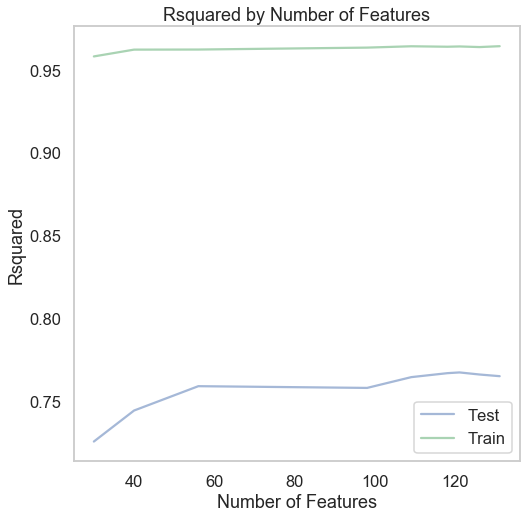

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   35.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   35.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   

R2 in Test Set:  0.7655066131254915
R2 in Train Set:  0.9642169302422993
Number of Features:  121


[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished


In [195]:

X = df_boston_pred_1.drop(columns = ['total_price'])
y = df_boston_pred_1['total_price']
cutoffs = [3000, 2000, 1000, 100, 50, 20, 10, 5, 1]
params = {'n_estimators': [1000], 'max_depth': [1, 5, 10, 100]}
r2_test, r2_train, rf_model, X_train, X_test, y_train, y_test = find_optimal_rf_gs_mod(X, y, cutoffs, param_grid=params)

print('R2 in Test Set: ', r2_test)
print('R2 in Train Set: ', r2_train)

print('Number of Features: ', X_train.shape[1])

In [196]:
#get the importance of the features for the best model obtained.
importances = rf_model.feature_importances_
feat_names = X_train.columns
tree_result_boston = pd.DataFrame({'feature': feat_names, 'importance': importances})

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   20.8s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   22.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   41.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   42.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurr

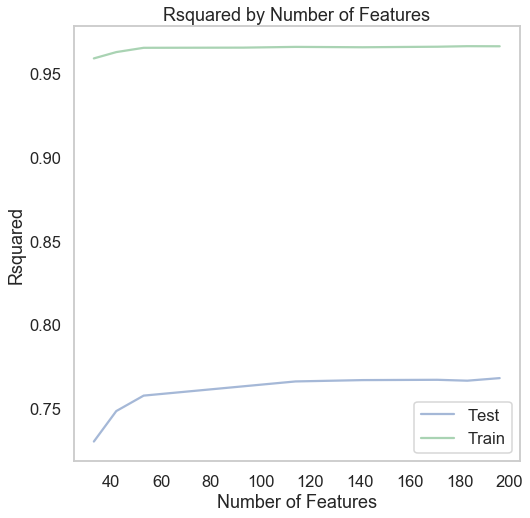

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   49.8s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   48.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   

R2 in Test Set:  0.7668909062232196
R2 in Train Set:  0.9656047638234689
Number of Features:  196


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished


In [197]:

X = df_seattle_pred_1.drop(columns = ['total_price'])
y = df_seattle_pred_1['total_price']
cutoffs = [3000, 2000, 1000, 100, 50, 20, 10, 5, 1]
params = {'n_estimators': [1000], 'max_depth': [1, 5, 10, 100]}
r2_test, r2_train, rf_model, X_train, X_test, y_train, y_test = find_optimal_rf_gs_mod(X, y, cutoffs, param_grid=params)

print('R2 in Test Set: ', r2_test)
print('R2 in Train Set: ', r2_train)

print('Number of Features: ', X_train.shape[1])

In [198]:
#get the importance of the features for the best model obtained.
importances = rf_model.feature_importances_
feat_names = X_train.columns
tree_result_seattle = pd.DataFrame({'feature': feat_names, 'importance': importances})

<a id='Importance'></a>
### Comparison of the Importance of the Features 

Let's take a look at the 20 most important features and compare them. What are the features that supose a bigger decrement in the RSS?

In [199]:
#get the 20 features more important
tree_result_boston1 = tree_result_boston.sort_values(by='importance',ascending=False)[:20]
tree_result_seattle1 = tree_result_seattle.sort_values(by='importance',ascending=False)[:20]

In [200]:
#put them in a single dataframe
tree_result_boston1['city'] = 'Boston'
tree_result_seattle1['city'] = 'Seattle'
comp_tree_df = tree_result_boston1.append(tree_result_seattle1, ignore_index=True, sort=False)

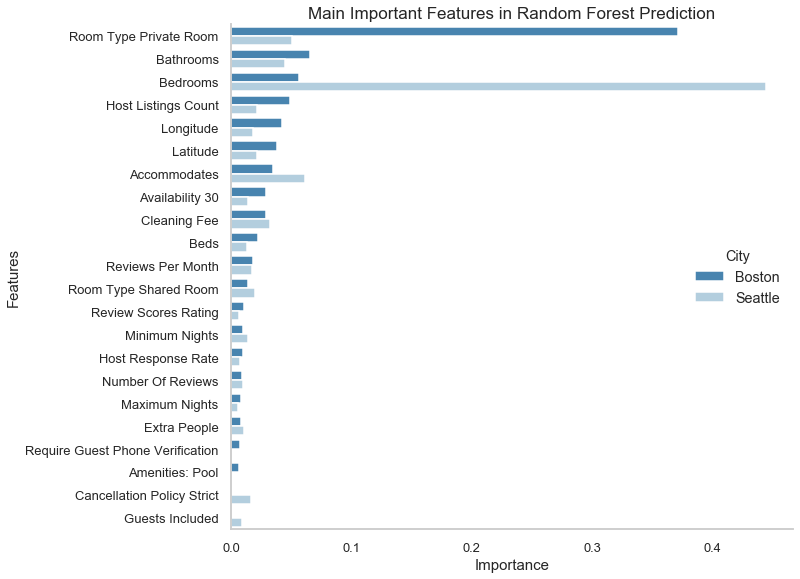

In [201]:
#We change the names of the amenities
comp_tree_df['feature'] = comp_tree_df['feature'].str.replace('amenities_', 'Amenities: ').str.replace('_', ' ')
comp_tree_df['feature'] = comp_tree_df['feature'].str.replace('room_type_', 'Room Type: ')
comp_tree_df['feature'] = comp_tree_df['feature'].str.replace('cancellation_policy_', 'Cancellation Policy: ')
comp_tree_df['feature'] = comp_tree_df['feature'].str.replace('neighbourhood_cleansed_', 'Neighbourhood: ')

#Change the name of the features to title format
comp_tree_df['feature'] = comp_tree_df['feature'].str.replace('_', ' ').str.title()
#depict a catplot with the neighbourhood group as the hue variable 
ax = sns.catplot(x='importance', 
                y='feature', 
                hue='city', 
                data=comp_tree_df, kind='bar', 
                height=8, 
                aspect=1.5, 
                palette="Blues_r",
                legend=False);

#adapt the labels, title, legend, etc.
plt.xlabel('Importance', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Main Important Features in Random Forest Prediction', fontsize=17)
plt.legend(title= "City", title_fontsize = 'x-large', loc= 'center right', fontsize = 'x-large', frameon = False)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

plt.savefig('random_forest_main_important_features.png');

#### Conclusions:

* We can see here that, in contrast with linear regression, the neighbourhood is not relevant when we apply Random Forests.


* We also see that Private Room is the main feature in Boston while number of Bedrooms is the main Feature in Seattle.


* The position on the map, determined by latitude and longitude, is more important in Boston than in Seattle.

We are going to take a look to distribution of prices for the variables `room_type` and `bedrooms` to try to understand the difference in the importance that we saw before.

In [202]:
#In this case, we revert the dummy columns referred to property type to draw boxplots with the distribution of prices
df_boston_aux = df_boston_listings_limited[['total_price'] + [boston_room_type_int] + boston_room_type_cols]
df_seattle_aux = df_seattle_listings_limited[['total_price'] + [seattle_room_type_int] + seattle_room_type_cols]

def undummy(d):
    return d.columns[d.values.argmax(1)]

df_boston_aux = df_boston_aux.assign(room_type=df_boston_aux.filter(regex='^room_type').pipe(undummy))
df_seattle_aux = df_seattle_aux.assign(room_type=df_seattle_aux.filter(regex='^room_type').pipe(undummy))

df_boston_aux['room_type'] = df_boston_aux['room_type'].str.replace('room_type_', '').str.replace('_', ' ').str.title()
df_seattle_aux['room_type'] = df_seattle_aux['room_type'].str.replace('room_type_', '').str.replace('_', ' ').str.title()

In [203]:
df_boston_aux.room_type.value_counts()

Entire Home/Apt    2087
Private Room       1347
Shared Room          79
Name: room_type, dtype: int64

In [204]:
df_seattle_aux.room_type.value_counts()

Entire Home/Apt    2518
Private Room       1157
Shared Room         117
Name: room_type, dtype: int64

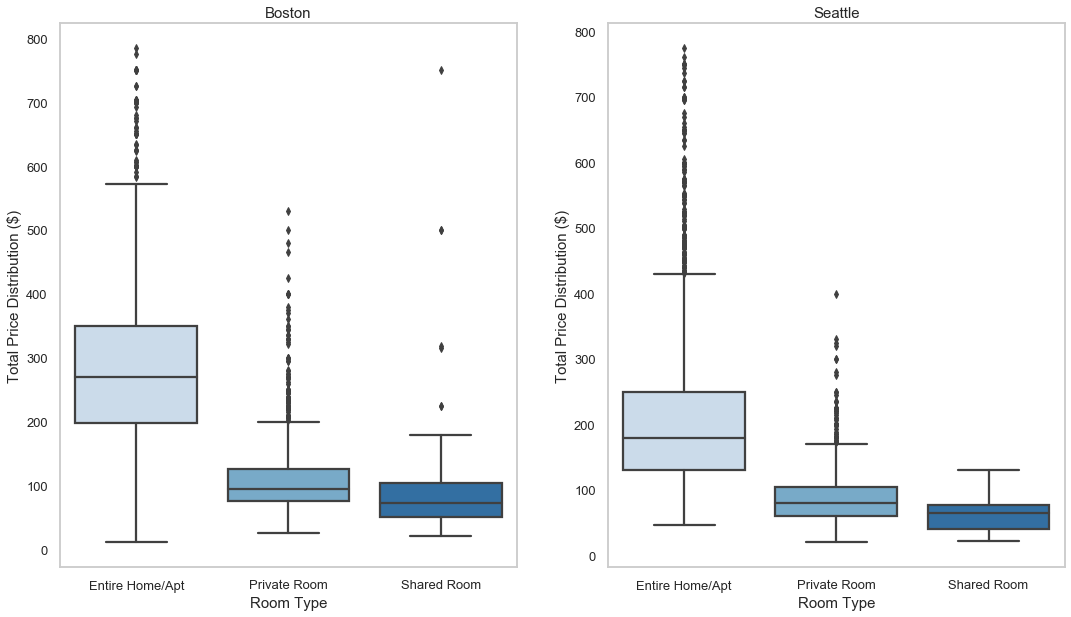

In [205]:
plt.subplots(figsize=(18,10))
#Boxplot with the distribution of the total_price by room_type in the listings of Boston
plt.subplot(1, 2, 1)
ax = sns.boxplot(x=df_boston_aux.room_type, 
                 y=df_boston_aux.total_price, 
                 palette="Blues")

ax.set_xlabel("Room Type",fontsize=15)
ax.set_ylabel("Total Price Distribution ($)",fontsize=15)
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_title("Boston", fontsize=15)

#Boxplot with the distribution of the total_price by room_type in the listings of Seattle
plt.subplot(1, 2, 2)
ax = sns.boxplot(x=df_seattle_aux.room_type, 
                 y=df_seattle_aux.total_price, 
                 palette="Blues")

ax.set_xlabel("Room Type",fontsize=15)
ax.set_ylabel("Total Price Distribution ($)",fontsize=15)
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_title("Seattle", fontsize=15);

With a naked eye, I can't apreciate a very big difference between the two plots, but it is true that Boston seems to have a little more variations in the prices that Seattle for this feature.

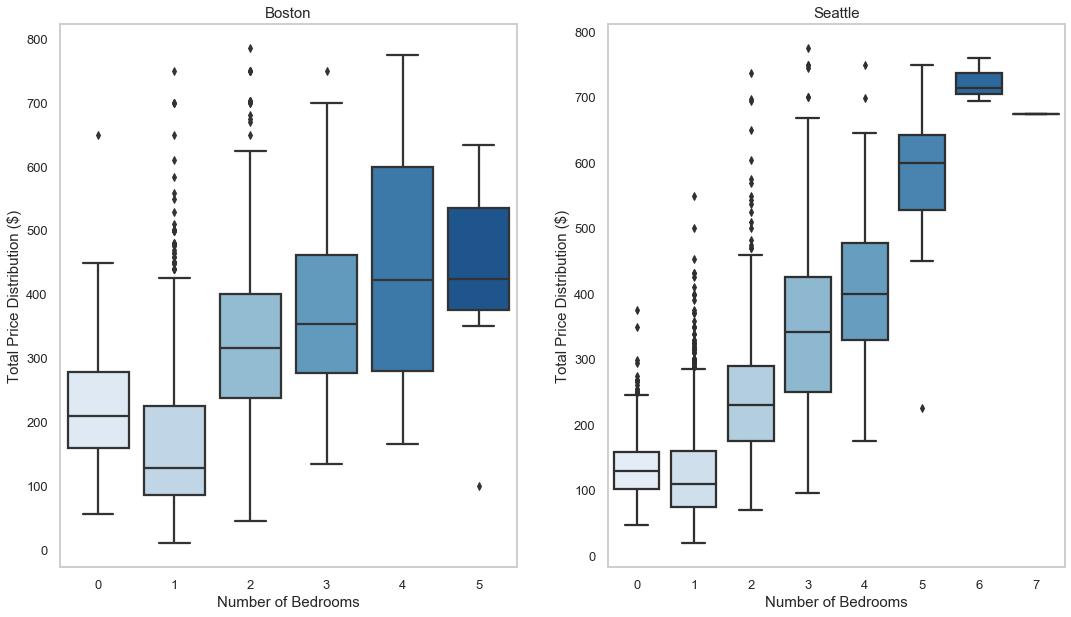

In [206]:
plt.subplots(figsize=(18,10))
#Boxplot with the distribution of the total_price by bedrooms in the listings of Boston
plt.subplot(1, 2, 1)
ax = sns.boxplot(x=df_boston_listings_limited.bedrooms, 
                 y=df_boston_listings_limited.total_price, 
                 palette="Blues")

ax.set_xlabel("Number of Bedrooms",fontsize=15)
ax.set_ylabel("Total Price Distribution ($)",fontsize=15)
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_title("Boston", fontsize=15)

#Boxplot with the distribution of the total_price by bedrooms in the listings of Seattle
plt.subplot(1, 2, 2)
ax = sns.boxplot(x=df_seattle_listings_limited.bedrooms, 
                 y=df_seattle_listings_limited.total_price, 
                 palette="Blues")

ax.set_xlabel("Number of Bedrooms",fontsize=15)
ax.set_ylabel("Total Price Distribution ($)",fontsize=15)
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_title("Seattle", fontsize=15);

In this case we can see a greater varitation in the price depending of the number of bedrooms for Seattle. This could explain the bigger imporance of this feature in the random forest model.